# Business Objective
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders.

Objective is to identify the risky loan applicants at the time of loan application so that such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment. And thus minimise the risk of losing money while lending to customers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style='white')

## Data Loading

In [2]:
DATA_FOLDER = 'data/'
LOAN = DATA_FOLDER + 'loan.csv'
LOAN_CLEANED = DATA_FOLDER + 'loan_cleaned.csv'

In [3]:
# Load the loan
loan = pd.read_csv(LOAN, encoding = 'ISO-8859-1',low_memory=False) #Also Tried ISO-8859-1, TA suggestion on forum.
print(loan.shape)
loan.describe()
loan.head()


(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Data Cleaning

#### 1. Dropping columns with >50% missing data

In [4]:
# Missing values per column expressed as % of total number of values
missing_column = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing_column.loc[missing_column > 50]

print("Total columns with more 50% data missing:",len(missing_column.loc[missing_column > 50]))

print("Column names which will be dropped: ",missing_column.loc[missing_column > 50].index)
drop_columns = missing_column.loc[missing_column > 50].index

# dropping these columns
print("shape before dropping",loan.shape)
loan = loan.drop(drop_columns,axis=1)
print("shape after dropping",loan.shape)

Total columns with more 50% data missing: 57
Column names which will be dropped:  Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'nu

In [5]:
#Checking
missing_column = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing_column.loc[missing_column > 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [6]:
# let's remove the desc column as an equivalent short and consise information is present in the purpose.
loan = loan.drop('desc',axis=1)

In [7]:
# Let us try to find out what kind of spread in unique values is present in nominal and continuous variables.
loan_columns = loan.columns
for col in loan_columns:
    print("unique entries in "+ col +" : %d"  % len(loan[col].unique()))
    if(len(loan[col].unique())) < 20:
            print(loan[col].unique())
            print("\n")

unique entries in id : 39717
unique entries in member_id : 39717
unique entries in loan_amnt : 885
unique entries in funded_amnt : 1041
unique entries in funded_amnt_inv : 8205
unique entries in term : 2
[' 36 months' ' 60 months']


unique entries in int_rate : 371
unique entries in installment : 15383
unique entries in grade : 7
['B' 'C' 'A' 'E' 'F' 'D' 'G']


unique entries in sub_grade : 35
unique entries in emp_title : 28821
unique entries in emp_length : 12
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]


unique entries in home_ownership : 5
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']


unique entries in annual_inc : 5318
unique entries in verification_status : 3
['Verified' 'Source Verified' 'Not Verified']


unique entries in issue_d : 55
unique entries in loan_status : 3
['Fully Paid' 'Charged Off' 'Current']


unique entries in pymnt_plan : 1
['n']


unique entries in url : 39717
unique entries in purpose : 

In [8]:
#From the output above all columns with single unique can be removed.
loan_columns_non_useful = ['pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code', 'application_type',
                          'acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens']
# dropping columns
print("shape before dropping",loan.shape)
loan = loan.drop(loan_columns_non_useful,axis=1)
print("shape after dropping",loan.shape)

shape before dropping (39717, 53)
shape after dropping (39717, 44)


In [9]:
#Checking again for null values
missing_column = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing_column.loc[missing_column > 0]

# dropping rows
print("shape before removing null rows",loan.shape)
loan=loan[~loan.emp_length.isnull()]
print("shape after removing null rows",loan.shape)

shape before removing null rows (39717, 44)
shape after removing null rows (38642, 44)


In [10]:
# loan.nunique().sort_values()

#### 2. Remove the following Columns which does not provide much explanation for default or are identifier columns for the current EDA analysis.

In [11]:
# Remove the following Columns which does not provide any meaning to EDA analysis. 
print('Dropping the following list of columns as these columns are not needed for the EDA analysis')

column_list = ['id','member_id','funded_amnt','pymnt_plan','url','zip_code','initial_list_status','policy_code'
               ,'application_type','acc_now_delinq','delinq_amnt']

for column in column_list:
    print('Dropping', column, '...')
    try:
        loan.drop(column, axis=1, inplace=True)
    except:
        print('\tColumn already dropped...')
        continue

Dropping the following list of columns as these columns are not needed for the EDA analysis
Dropping id ...
Dropping member_id ...
Dropping funded_amnt ...
Dropping pymnt_plan ...
	Column already dropped...
Dropping url ...
Dropping zip_code ...
Dropping initial_list_status ...
	Column already dropped...
Dropping policy_code ...
	Column already dropped...
Dropping application_type ...
	Column already dropped...
Dropping acc_now_delinq ...
	Column already dropped...
Dropping delinq_amnt ...
	Column already dropped...


In [12]:
# Remove the following Columns are not always present at the time of loan application.
print('Dropping the following list of columns as these columns are not needed for the EDA analysis')

column_list = [
    "delinq_2yrs","earliest_cr_line","inq_last_6mths","out_prncp","out_prncp_inv","total_pymnt",
    "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee",
    "application_type"]


for column in column_list:
    print('Dropping', column, '...')
    try:
        loan.drop(column, axis=1, inplace=True)
    except:
        print('\tColumn already dropped...')
        continue

Dropping the following list of columns as these columns are not needed for the EDA analysis
Dropping delinq_2yrs ...
Dropping earliest_cr_line ...
Dropping inq_last_6mths ...
Dropping out_prncp ...
Dropping out_prncp_inv ...
Dropping total_pymnt ...
Dropping total_pymnt_inv ...
Dropping total_rec_prncp ...
Dropping total_rec_int ...
Dropping total_rec_late_fee ...
Dropping recoveries ...
Dropping collection_recovery_fee ...
Dropping application_type ...
	Column already dropped...


In [13]:
# loan.nunique().sort_values()

### Date formatting

1. Converting to Datetime
2. removing '%' from int_rate to make to numeric
3. mapping emp_length from a string to a numeric field
4. seperating 'months' from the term column
5. retaining onlt fully paid or charged off loans

In [14]:
datetime_colmns=['issue_d']
# datetime_colmns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']

for col in datetime_colmns:
    loan[col] = pd.to_datetime(loan[col], format='%b-%y')
    
# extracting month and year from issue_date
loan['month'] = loan['issue_d'].apply(lambda x: x.month)
loan['year'] = loan['issue_d'].apply(lambda x: x.year)

In [15]:
loan.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11214
2011    20899
Name: year, dtype: int64

In [16]:
loan['int_rate'] = loan['int_rate'].str.strip('%').astype('float')
# loan['revol_util'] = loan['revol_util'].str.strip('%').astype('float')

In [17]:
# Let us now take a look at the emp_length column.
# According to the data_dictionary file description for this field,emp_length: Employment length in years. 
# Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
# Let's convert the column to have values between 0 and 10.
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}
loan = loan.replace({"emp_length": emp_length_dict })

In [18]:
# The column term: The number of payments on the loan. Values are in months and can be either 36 or 60.
# removing the months string from within the column term.
print(loan.term.value_counts())
loan['term'] = loan.term.apply(lambda x: x.split()[0])
print(loan.term.value_counts())

 36 months    28287
 60 months    10355
Name: term, dtype: int64
36    28287
60    10355
Name: term, dtype: int64


In [19]:
loan.to_csv(LOAN_CLEANED, encoding= 'ISO-8859-1', index=False)

In [20]:
loan_cleaned = pd.read_csv(LOAN_CLEANED, encoding = 'ISO-8859-1',low_memory=False) #Also Tried ISO-8859-1, TA suggestion on forum.

In [21]:
# filtering only fully paid or charged-off
loan_cleaned = loan_cleaned[loan_cleaned['loan_status'] != 'Current']
loan_cleaned['loan_defaulted'] = loan_cleaned['loan_status'].apply(lambda x: 'No' if x=='Fully Paid' else 'Yes')
loan_cleaned['loan_status'] = loan_cleaned['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)


# converting loan_status to integer type
loan_cleaned['loan_status'] = loan_cleaned['loan_status'].apply(lambda x: pd.to_numeric(x))

In [22]:
## List of all variables we have available for univariate analysis
loan_cleaned.info()
nominal = ['term','emp_length','grade','sub_grade','home_ownership','verification_status','purpose']
quant = ['loan_amnt','int_rate','installment','annual_inc','dti']
target = ['loan_status']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 38641
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37544 non-null  int64  
 1   funded_amnt_inv       37544 non-null  float64
 2   term                  37544 non-null  int64  
 3   int_rate              37544 non-null  float64
 4   installment           37544 non-null  float64
 5   grade                 37544 non-null  object 
 6   sub_grade             37544 non-null  object 
 7   emp_title             36136 non-null  object 
 8   emp_length            37544 non-null  int64  
 9   home_ownership        37544 non-null  object 
 10  annual_inc            37544 non-null  float64
 11  verification_status   37544 non-null  object 
 12  issue_d               37544 non-null  object 
 13  loan_status           37544 non-null  int64  
 14  purpose               37544 non-null  object 
 15  title              

## 1. Univariate Analysis

In [23]:
# lets define a function to plot loan_status across categorical variables
def plot_cat(cat_var,title="Nominal varaible plot",ylabel="No. of loans"):
    plt.figure(figsize=(8, 6))
    order = loan_cleaned[cat_var].value_counts(ascending=True).index
    ax = sns.countplot(y=cat_var,  data=loan_cleaned, order = order, palette = 'muted')
    ax.set_title(title)
    ax.set_xlabel(ylabel)
    plt.show()

def plot_quant(quant_var,title="Quantitative variable plot",ylabel="fraction of loans"):
    #     sns.barplot(x=cat_var, y='loan_status', data=loan_cleaned)
    plt.figure(figsize=(8, 6))
    #   sns.distplot(loan_cleaned[quant_var])
    
    ax = sns.distplot(loan_cleaned[quant_var],color='b')
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax2 = ax.twinx()
    sns.boxplot(x=loan_cleaned[quant_var], ax=ax2)
    ax2.set(ylim=(-0.5, 10))
    plt.show()

 # lets define a function to plot loan_status across categorical variables
def plot_seg_cat(cat_var):
    order = loan_cleaned[cat_var].value_counts(ascending=True).index
    sns.barplot(x=cat_var, y='loan_status', data=loan_cleaned)
    plt.show()
    
 # lets define a function to plot loan_status across categorical variables
def plot_seg_univariate(x_cat_var, y_quant, title="Quantitative variable plot",xlabel="fraction of loans",ylabel="fraction of loans"):
    #plt.figure(figsize=(8, 6))
    order = sorted(set(loan_cleaned[x_cat_var]))
    if x_cat_var == 'home_ownership':
        df = loan_cleaned[loan_cleaned[x_cat_var]!='NONE']
        ax = sns.barplot(x=x_cat_var, y=y_quant, data = df, palette = 'muted')
    else:
        ax = sns.barplot(x=x_cat_var, y=y_quant, data=loan_cleaned, palette = 'muted', order = order)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    #plt.show()   

### 1.1 Target variable : loan_status

In [24]:
# summarising the values
loan_cleaned['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

In [25]:
# default rate
round(np.mean(loan_cleaned['loan_status']), 2)
# The overall default rate is about 14%

0.14

Text(0.5, 1.0, 'Distribution of Loans')

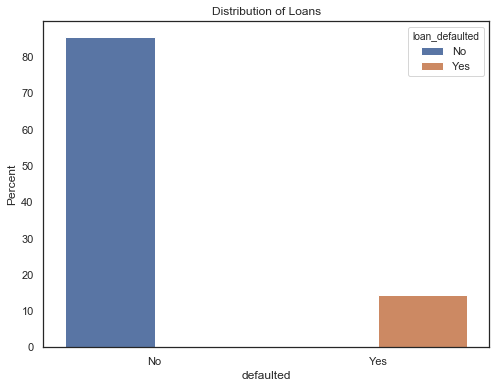

In [26]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="loan_defaulted", y="loan_status", hue='loan_defaulted',data=loan_cleaned, estimator=lambda x: len(x) / len(loan_cleaned) * 100)
ax.set(ylabel="Percent")
ax.set(xlabel="defaulted")
ax.set_title("Distribution of Loans")

## 1.2 Nominal variables

We are going to analyse the following categorical variables 'term', 'emp_length', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose'

### 1.2.1 Term
**Observations:**
1. Most loans sanctioned are of 36 months, whereas 60 months is the less popular option.
2. This may indicate that Lending Club(LC) would sanction a short term loan since there is lesser risk of defaulting

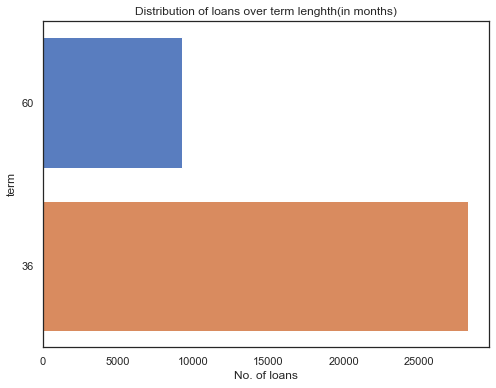

In [27]:
plot_cat('term',"Distribution of loans over term lenghth(in months)","No. of loans")
# title
# ylabel
# need to add these parameter to the function.

### 1.2.2 Employee length
**Observations:**
1. Most loans belong to employees with more than 10+ years of work experience, the reason is capping of work experience to 10
2. People with less work experience have less financial saving hence require loans.
3. Along with being a Nominal variables it is also a ordinal one, hence we can see a trend that the requirement of loans depleted as the experience increases.

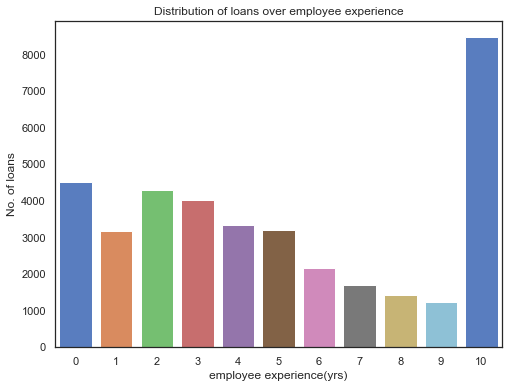

In [28]:
# plot_cat('emp_length')
title = "Distribution of loans over employee experience"
ylabel = "No. of loans"
cat_var = "emp_length"
plt.figure(figsize=(8, 6))
order = set(loan_cleaned[cat_var])
ax = sns.countplot(x=cat_var,  data=loan_cleaned, order = order, palette = 'muted')
ax.set_title(title)
ax.set_ylabel(ylabel)
ax.set_xlabel("employee experience(yrs)")
plt.show()

### 1.2.3 Grade
**Observations:**
1. Most loans belong to Grade B. whereas A being the loan of highest grade that is most safest.
2. Since grade B is having highest amount of loans LC is susceptable to default which we need to investigate.
3. Except grade B, we can see that the number of loans sanctioned are drop that show that LC is trying to avert risk loans whihc is good.

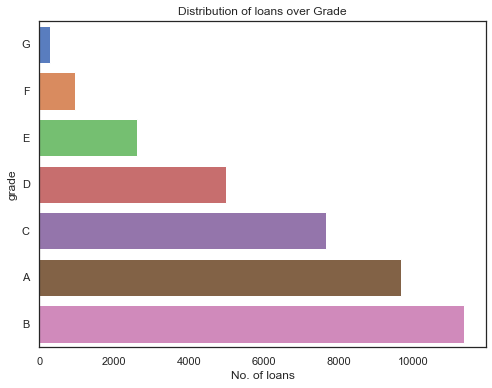

In [29]:
plot_cat('grade',"Distribution of loans over Grade")

### 1.2.4 Sub Grade
**Observations:**
1. There is clear trend that as the grade diminishes the number of loans also decreases
2. But we should pay attention to, grade A and grade B, where the loans peak as we move from A to B, conveying that huge, majority get B loans and A grade loans are less.

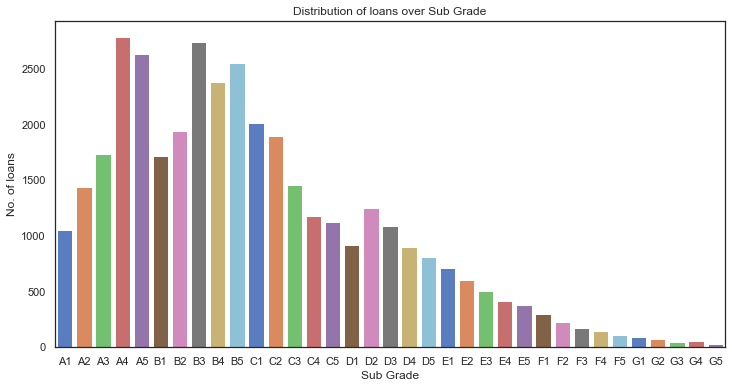

In [30]:
# plot_cat('sub_grade')
# redo
# normal bar plot
# ordering on alphabetical order
title = "Distribution of loans over Sub Grade"
ylabel = "No. of loans"
cat_var = "sub_grade"
plt.figure(figsize=(12, 6))
order = sorted(set(loan_cleaned[cat_var]))
ax = sns.countplot(x=cat_var,  data=loan_cleaned, order = order, palette = 'muted')
ax.set_title(title)
ax.set_ylabel(ylabel)
ax.set_xlabel("Sub Grade")
plt.show()

### 1.2.5 Homeownership
**Observations:**
1. Majority loans sanctioned are from people who stay on rent, we need to investigate whether these are collateral or non-collateral loans as the latter always have a higher risk.
2. Also people with an existing house mortgage also have a pretty high share, It makes these loans riskier since these applicant will be under fiancial stress of two loans.
3. People with mortgage free loans havent not applied to LC as they could get loans from public banks as well.

**Note :** home_ownership vs purpose will be pretty interesting.
Assumption only for this graph, LC is a private moneylender.


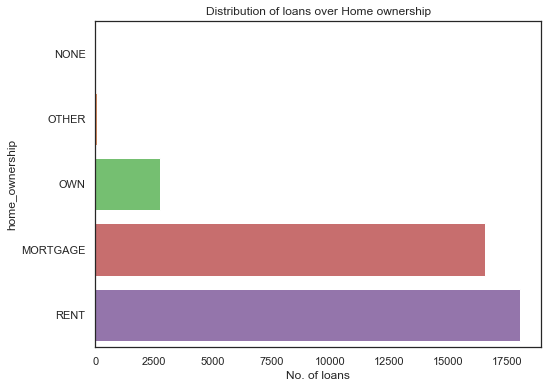

In [31]:
plot_cat('home_ownership',"Distribution of loans over Home ownership")

### 1.2.6 Purpose
**Observations:**
1. Majority loans sanctioned are for debt_consolidation that is to pay other smaller loans. Hence applicant is already a under financial stress
2. Next majority share is for credit card, to clear credit card dues.
3. Other loans also are personal loans.
4. The difference is striking huge from the second most category, it may indicate that the LC primarily tends to debt consolidation loans.

**Note** : home_ownership vs purpose will be pretty interesting.

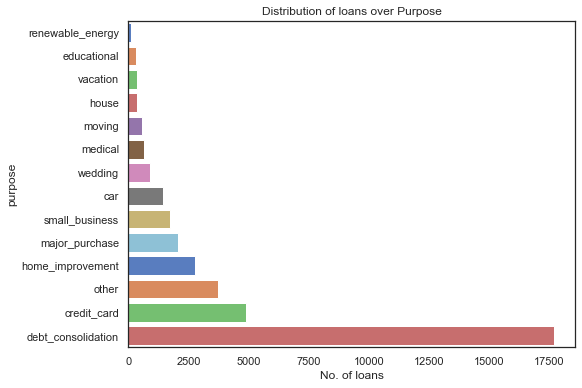

In [32]:
plot_cat('purpose',"Distribution of loans over Purpose")

### 1.2.7 Verification status
**Observations:**
1. There is no polarity or distributional variances for verification status.

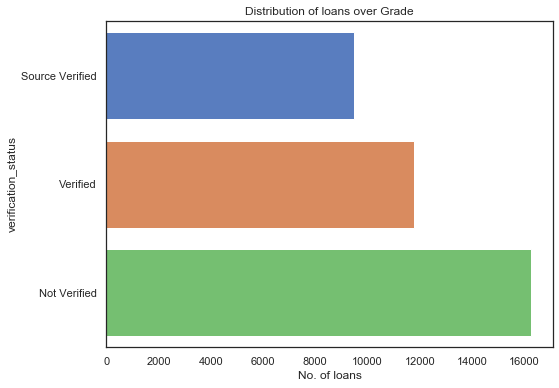

In [33]:
plot_cat('verification_status',"Distribution of loans over Grade")

#### Nominal Univariate: Just by looking at the distribution of loans across different nominal univariate we can are able to make some hypothesis and make us ask more interesting questions like,
1. Are people with less experience default more?
2. Are rented people more prone to default loans whereas people who own a house safely pay their loans off.
3. Is there a relation between loan status and purpose?

But before we jump to seek answers to these questions, Let us look the Quantitative variables.


## 1.3 Quantitative variables

we are going to analyse the following quatitative variables 'loan_amnt','int_rate','installment','annual_inc','dti'

### 1.3.1 Loan amount
**Observations:**
1. There is accumulation around round figure loans like 5K, 10K, 15K
2. Loans are spread upto 35K , But most lie from 5K to 15K

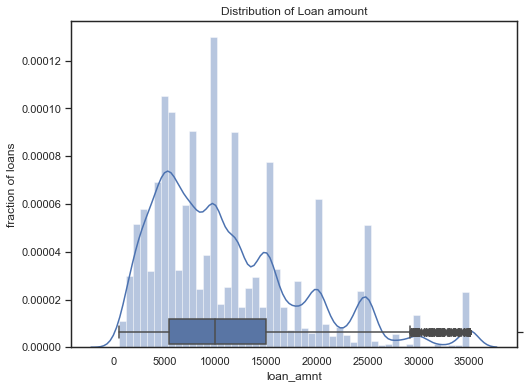

In [34]:
plot_quant('loan_amnt',"Distribution of Loan amount")

### 1.3.2 Interest Rate
**Observations:**
1. Most Loans have interest varying from 9-15%

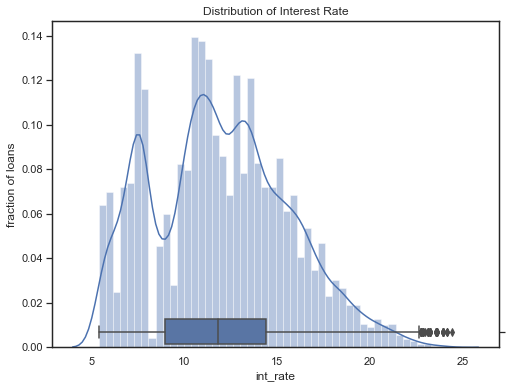

In [35]:
plot_quant('int_rate',"Distribution of Interest Rate")

### 1.3.3 Installment
**Observations:**
1. Installent follows the distribution of Loan amount as per expectation.
2. Outliers are more than normal.


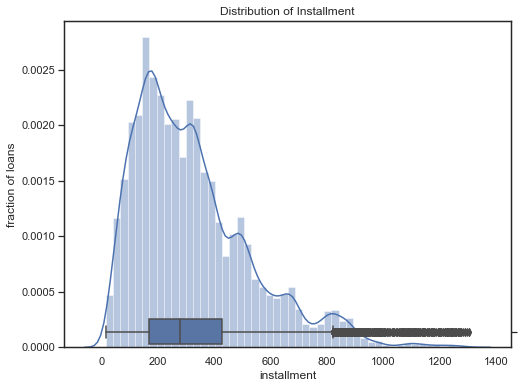

In [36]:
plot_quant('installment',"Distribution of Installment")

### 1.3.4 Annual Income
**Observations:**
1. Annual income has outlier hence we can trimmed the analysis to 100K
2. The distribution is well spread.
3. Plots are for annual income <100K and between 100k to 1M

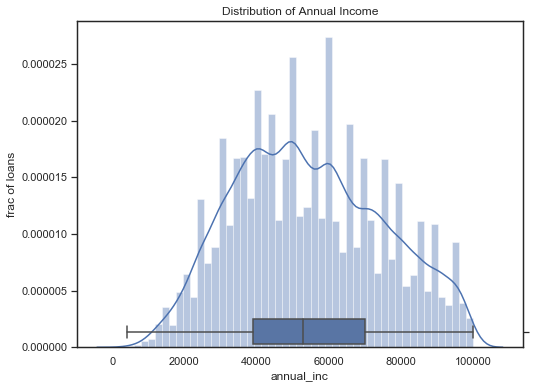

In [37]:
# plot_quant('annual_inc')
# annual income <100K
quant_var = 'annual_inc'
plt.figure(figsize=(8, 6))
trimmed_loan_cleaned = loan_cleaned[loan_cleaned[quant_var]<100000]
ax = sns.distplot(trimmed_loan_cleaned[quant_var],color='b')
ax.set_title("Distribution of Annual Income")
ax.set_ylabel("frac of loans")
ax2 = ax.twinx()
sns.boxplot(x=trimmed_loan_cleaned[quant_var], ax=ax2)
ax2.set(ylim=(-0.5, 10))
plt.show()

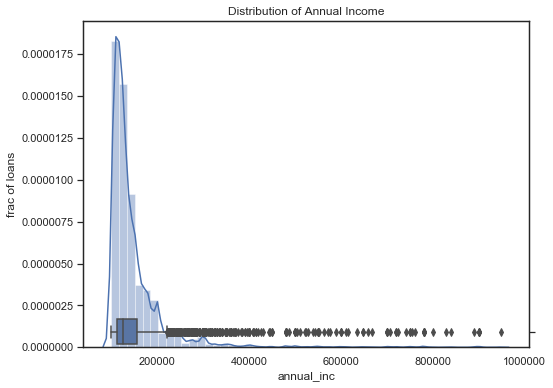

In [38]:
# annual income between 100k to 1M
quant_var = 'annual_inc'
plt.figure(figsize=(8, 6))
trimmed_loan_cleaned = loan_cleaned[(loan_cleaned[quant_var]>100000) & (loan_cleaned[quant_var]<1000000)]
ax = sns.distplot(trimmed_loan_cleaned[quant_var],color='b')
ax.set_title("Distribution of Annual Income")
ax.set_ylabel("frac of loans")
ax2 = ax.twinx()
sns.boxplot(x=trimmed_loan_cleaned[quant_var], ax=ax2)
ax2.set(ylim=(-0.5, 10))
plt.show()

### 1.3.5 dti
**Definition:** A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations,
excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
Observations:
1. Less dti is favourable as there will relatively less strain on the borrower. Whereas high dti will put more pressure on borrower

Note: does high lead to more default

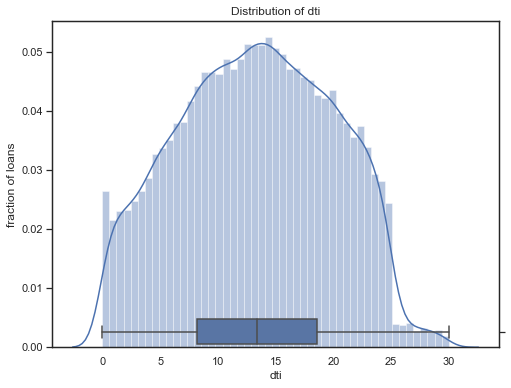

In [39]:
plot_quant('dti',"Distribution of dti")

#### Quantitative Univariate: Just by looking at the distribution of loans across different quantitaive univariate we can are able to see the overall picture of how much people are borrowing and how much they are earning, we need to look for
1. Do people with less loan amount default less?
2. Does Income effect default rate?

### 1.3.7 Power Law distribution on Nominal variable

**Observations:**
1. sub_grade shows Power law like distribution
2. purpose shows similar to that of Power law distribution
3. emp_length doesn't follows Power law distribution

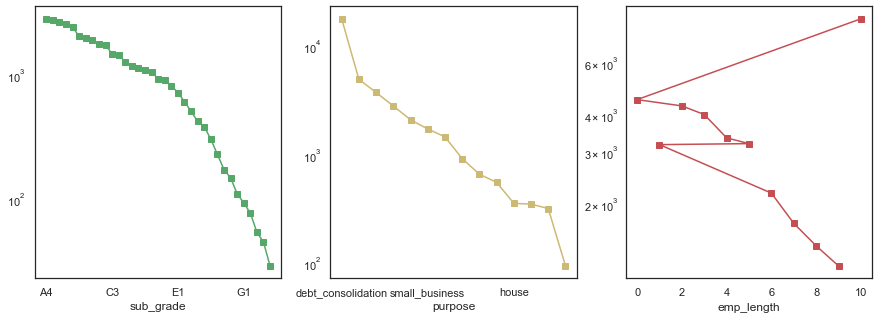

In [40]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
loan_cleaned.groupby('sub_grade').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='s', color='g')
plt.subplot(1, 3, 2)
loan_cleaned.groupby('purpose').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='s', color='y')
plt.subplot(1, 3, 3)
loan_cleaned.groupby('emp_length').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='s', color='r')
plt.show()

## 2. Segmented Univariate Analysis

Let us start with the segmented univariate analysis where quantitative variables distribution will be segmented across categorical variable. we are going to consider Grade, Home Ownership, Term, and Emp Length as our segments





### 2.1. Loan Status 

We check the Loan Status (Default Rate) over the following parameters :
1. Across Grade of Loan
2. Across Home Ownership Type
3. Across Loan Term
4. Accross Employment length of the Applicant

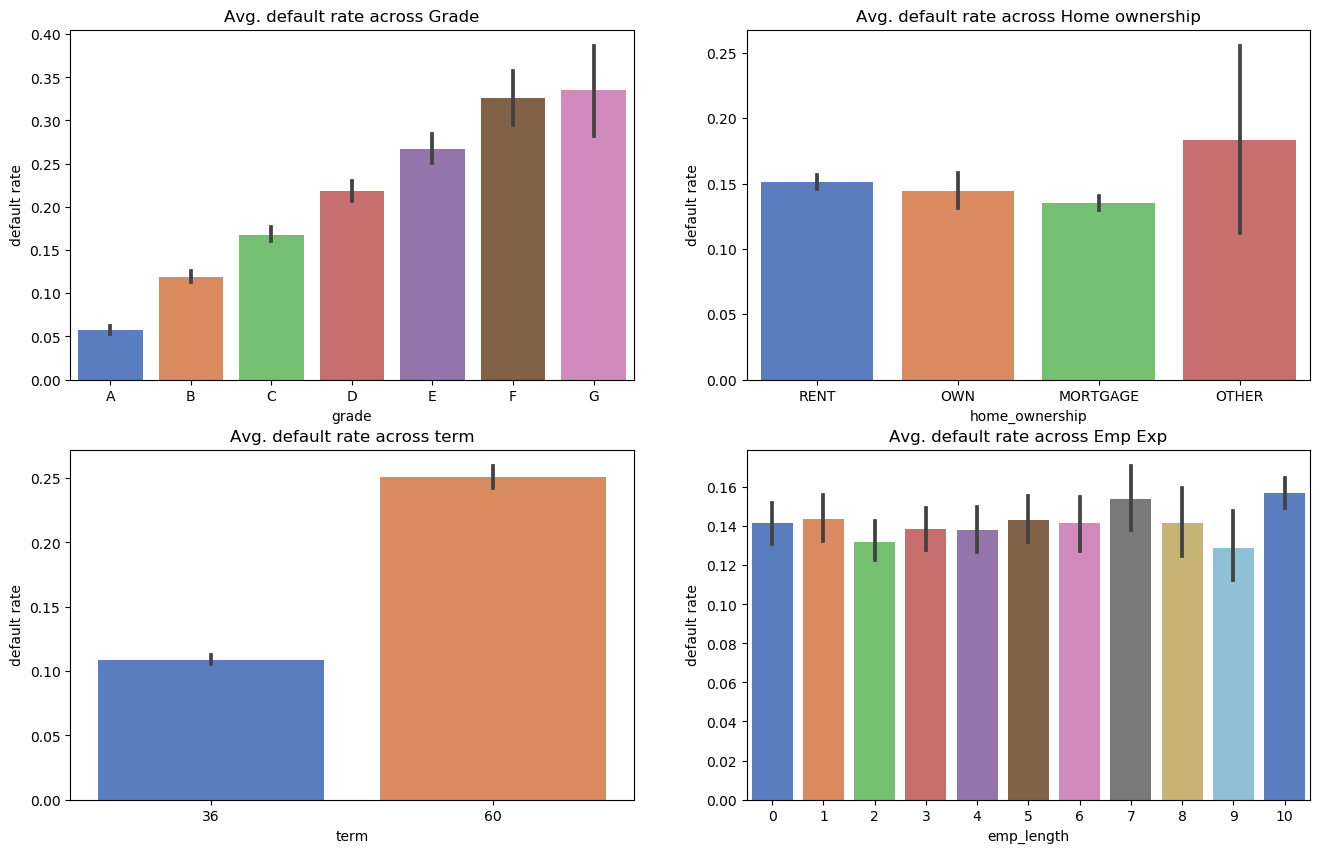

In [41]:
plt.rcdefaults()
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plot_seg_univariate('grade','loan_status',"Avg. default rate across Grade",'grade',"default rate")

plt.subplot(2, 2, 2)
plot_seg_univariate('home_ownership','loan_status',"Avg. default rate across Home ownership",'home_ownership',"default rate")

plt.subplot(2, 2, 3)
plot_seg_univariate('term','loan_status',"Avg. default rate across term",'term',"default rate")

plt.subplot(2, 2, 4)
plot_seg_univariate('emp_length','loan_status',"Avg. default rate across Emp Exp",'emp_length',"default rate")

plt.show()

**Observations :**
1. We can see the default rate increasing as the Grade decreasing this is a clear indicator that Low grade loans are riskier.
2. People without a proper leased home ownership have a high chance of defaulting. Though the volume is less. Rented people have the highest default rate among rent own and mortgage.
3. 60 month term has twice the default rate to that of the 36 month term
4. No significant different in default rate acorss empployee experience.





### 2.2. Loan Amount 


We check the Loan Amount over the following parameters :
1. Across Grade of Loan
2. Across Home Ownership Type
3. Across Loan Term
4. Accross Employment length of the Applicant

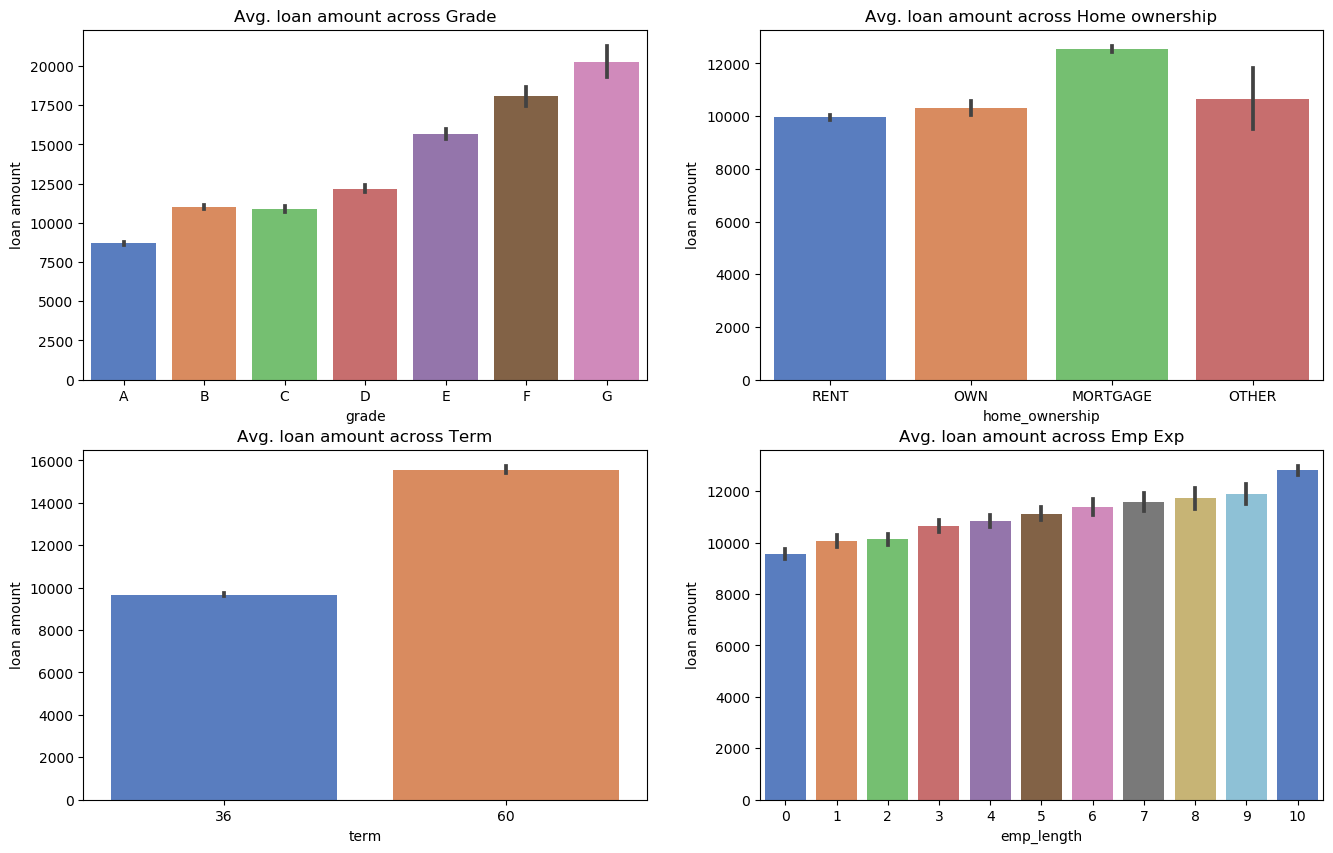

In [42]:
plt.rcdefaults()
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plot_seg_univariate('grade','loan_amnt',"Avg. loan amount across Grade",'grade',"loan amount")

plt.subplot(2, 2, 2)
plot_seg_univariate('home_ownership','loan_amnt',"Avg. loan amount across Home ownership",'home_ownership',"loan amount")

plt.subplot(2, 2, 3)
plot_seg_univariate('term','loan_amnt',"Avg. loan amount across Term",'term',"loan amount")

plt.subplot(2, 2, 4)
plot_seg_univariate('emp_length','loan_amnt',"Avg. loan amount across Emp Exp",'emp_length',"loan amount")

plt.show()


**Observations :**
1. We can see the loan amount increasing as the Grade decreasing.
2. People without a mortgage are having higher loan amount that the rest.
3. 60 month term has 1.5 times the loan amount to that of the 36 month term
4. We can see that as the experience increases the loan amount is also increasing. Hinting to a high saving.





### 2.3. Interest rate 

We check the Interest Rate charged over the following parameters :
1. Across Grade of Loan
2. Across Home Ownership Type
3. Across Loan Term
4. Accross Employment length of the Applicant

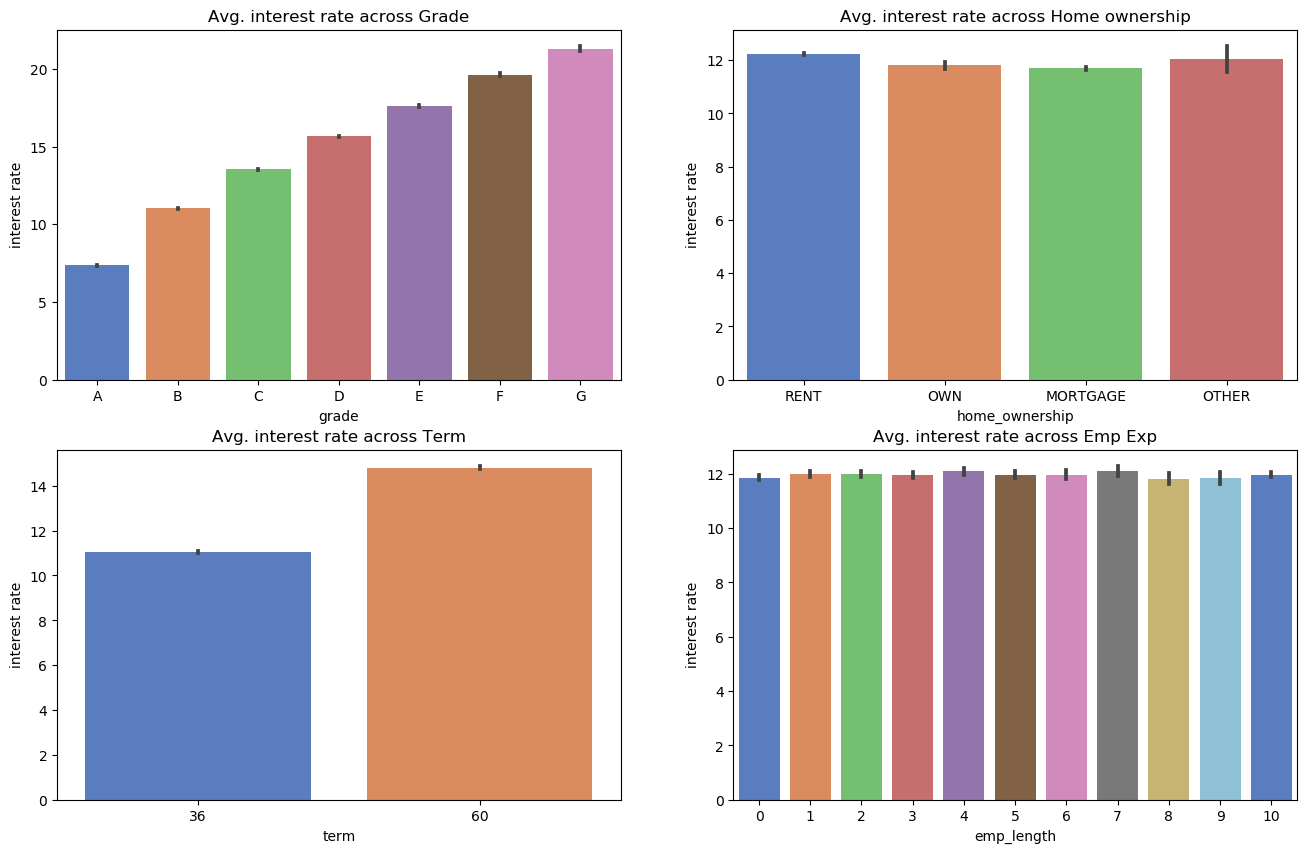

In [43]:
plt.rcdefaults()
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plot_seg_univariate('grade','int_rate',"Avg. interest rate across Grade",'grade',"interest rate")

plt.subplot(2, 2, 2)
plot_seg_univariate('home_ownership','int_rate',"Avg. interest rate across Home ownership",'home_ownership',"interest rate")

plt.subplot(2, 2, 3)
plot_seg_univariate('term','int_rate',"Avg. interest rate across Term",'term',"interest rate")

plt.subplot(2, 2, 4)
plot_seg_univariate('emp_length','int_rate',"Avg. interest rate across Emp Exp",'emp_length',"interest rate")

plt.show()

**Observations :**
1. We can see the interest rate increasing as the Grade decreasing.
3. 60 month term has a higher interest rate than of the 36 month term.


### 2.4. Installment 

We check the Installment amount over the following parameters :
1. Across Grade of Loan
2. Across Home Ownership Type
3. Across Loan Term
4. Accross Employment length of the Applicant

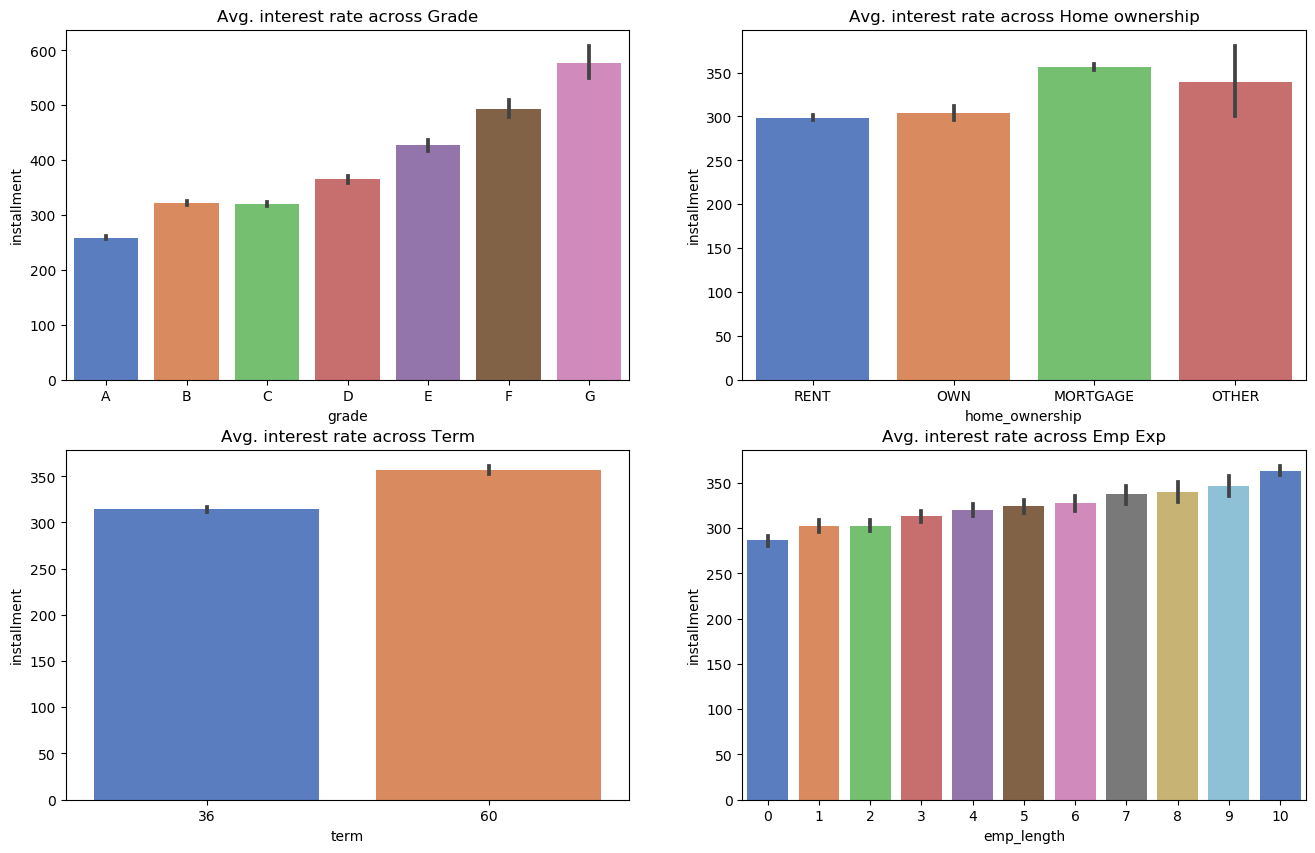

In [44]:
plt.rcdefaults()
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plot_seg_univariate('grade','installment',"Avg. interest rate across Grade",'grade',"installment")

plt.subplot(2, 2, 2)
plot_seg_univariate('home_ownership','installment',"Avg. interest rate across Home ownership",'home_ownership',"installment")

plt.subplot(2, 2, 3)
plot_seg_univariate('term','installment',"Avg. interest rate across Term",'term',"installment")

plt.subplot(2, 2, 4)
plot_seg_univariate('emp_length','installment',"Avg. interest rate across Emp Exp",'emp_length',"installment")

plt.show()

**Observations :**
1. We can see the Installment increasing as the Grade decreasing.
3. 60 month term has a higher installment than of the 36 month term.

### 2.5 Issue Year  [Derived Metrics]

We check the Issue year of the Loan amount over the following parameters :
1. Across Grade of Loan
2. Across Home Ownership Type
3. Across Loan Term
4. Accross Employment length of the Applicant

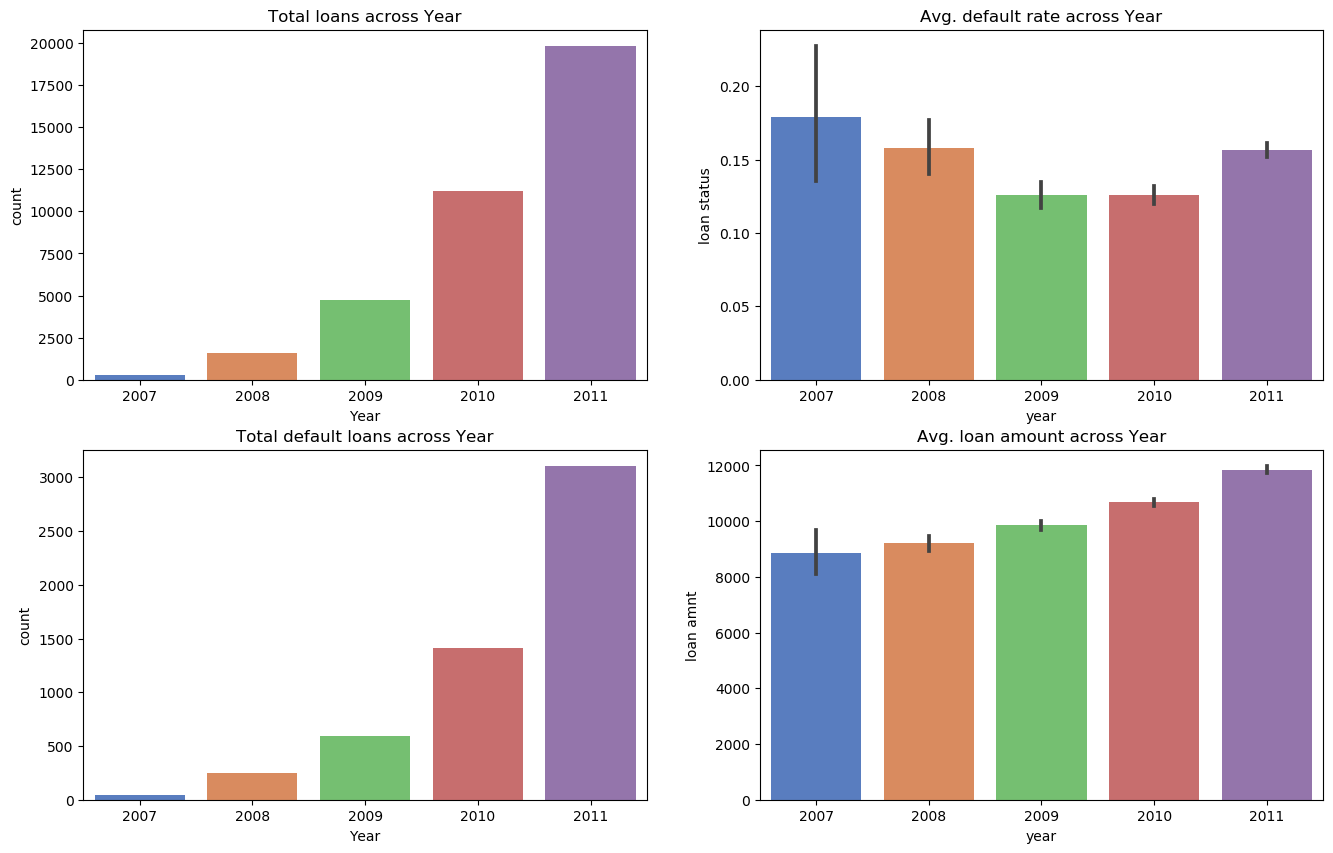

In [45]:
plt.rcdefaults()
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
order = loan_cleaned[cat_var].value_counts(ascending=True).index
ax = sns.countplot(x='year', data=loan_cleaned, palette = 'muted')
ax.set_title("Total loans across Year")
ax.set_xlabel("Year")

plt.subplot(2, 2, 3)
# plot_seg_univariate('year','loan_status')
ax = sns.countplot(x='year', data=loan_cleaned[loan_cleaned['loan_status']==1], palette = 'muted')
ax.set_title("Total default loans across Year")
ax.set_xlabel("Year")

plt.subplot(2, 2, 2)
plot_seg_univariate('year','loan_status',"Avg. default rate across Year",'year',"loan status")

plt.subplot(2, 2, 4)
plot_seg_univariate('year','loan_amnt',"Avg. loan amount across Year",'year',"loan amnt")

plt.show()


**Observations :**

1. Default rate decreased from 2007 to 2010 showing that the market has stabalize after the economic slow down. But The year 2011 has show an upward trend in the default rate.
2. Loan amount has been increasing over the years. Showing that the LC has been progressing, but at the same time the defaults are too so the firm needs to pay attention to it.

### 2.6 Purpose of Loan

We check the  Purpose of Loan over the following parameters :
1. Across Grade of Loan
2. Across Home Ownership Type
3. Across Loan Term
4. Accross Employment length of the Applicant

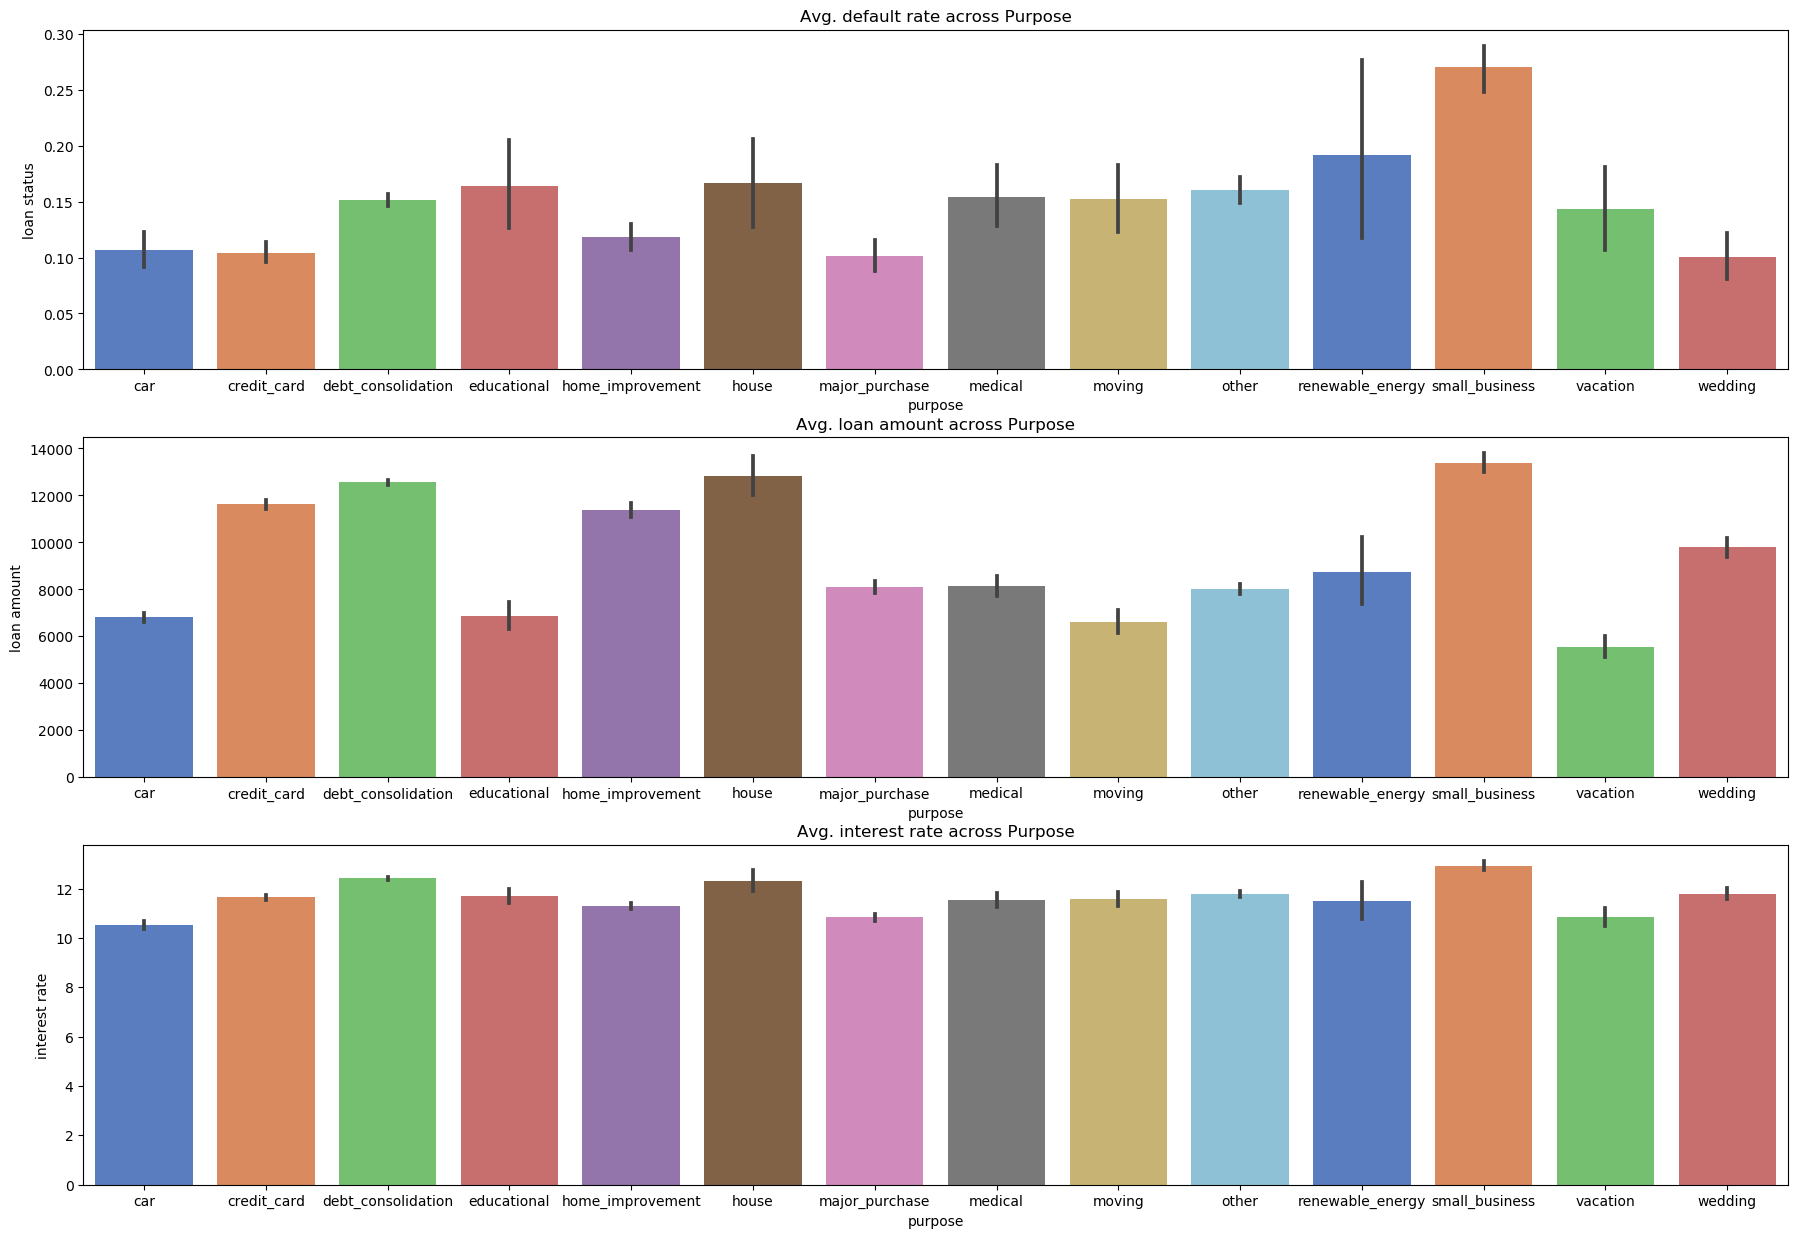

In [46]:
plt.rcdefaults()
plt.figure(figsize=(22, 15))

plt.subplot(3,1, 1)
plot_seg_univariate('purpose','loan_status',"Avg. default rate across Purpose",'purpose',"loan status")

plt.subplot(3,1, 2)
plot_seg_univariate('purpose','loan_amnt',"Avg. loan amount across Purpose",'purpose',"loan amount")

plt.subplot(3,1, 3)
plot_seg_univariate('purpose','int_rate',"Avg. interest rate across Purpose",'purpose',"interest rate")

plt.show()

**Observations :**

1. small business have the highest default rate. 
2. Wedding are purpose with the lowest default rate.
3. Debt consolidation loans default rate are in the middle.

### 2.7 Sub Grade of Loan

We check the  Sub-Grade/Quality of the issued Loan over the following parameters :
1. Across Grade of Loan
2. Across Home Ownership Type
3. Across Loan Term
4. Accross Employment length of the Applicant

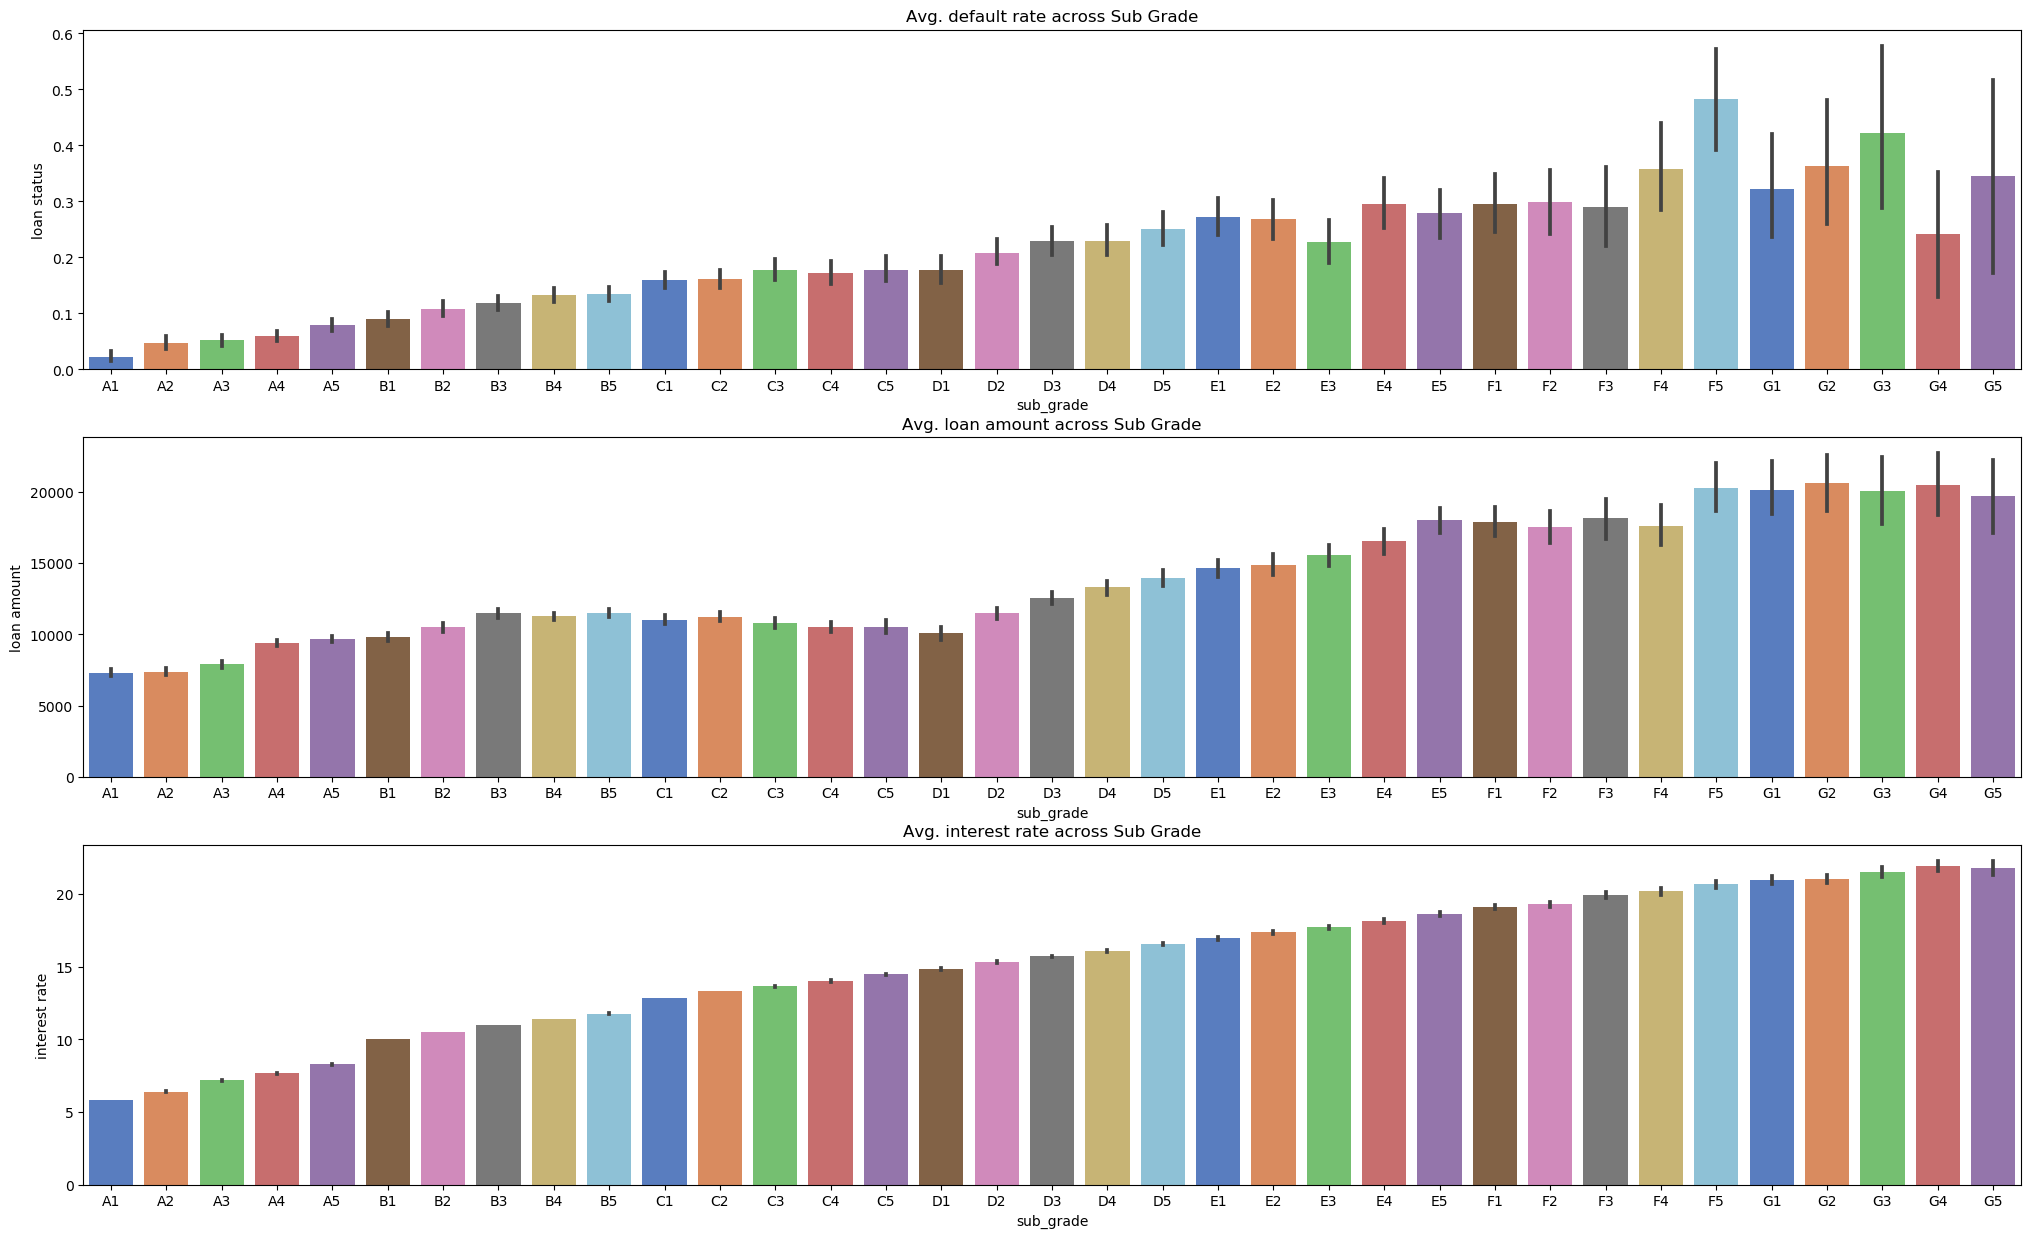

In [47]:
plt.rcdefaults()
plt.figure(figsize=(25, 15))

plt.subplot(3,1, 1)
plot_seg_univariate('sub_grade','loan_status',"Avg. default rate across Sub Grade",'sub_grade',"loan status")

plt.subplot(3,1, 2)
plot_seg_univariate('sub_grade','loan_amnt',"Avg. loan amount across Sub Grade",'sub_grade',"loan amount")

plt.subplot(3,1, 3)
plot_seg_univariate('sub_grade','int_rate',"Avg. interest rate across Sub Grade",'sub_grade',"interest rate")

plt.show()

**Observations :**
1. Sub grade also follow the similar trends of Grade.

## 3. Metrices

### 3.1.  Business Metrics :

We wanted to identify which loans may be defaulted. Based on hte provided business rules, we create a new column "Defaulted" depicting the same as boolean :
* Yes : If the Loan was charged off by Lending Company
* No : If the loan was fully paid or in Current state

In [48]:
loan_cleaned['defaulted'] = loan_cleaned['loan_status'].apply(lambda x: 'Yes' if x == 1 else 'No') #Discuss change here

print('Number of Loans Deafulted after merging Current and Fully Paid as Not Defaulted \n',
      loan_cleaned.groupby('defaulted')['defaulted'].count())

Number of Loans Deafulted after merging Current and Fully Paid as Not Defaulted 
 defaulted
No     32145
Yes     5399
Name: defaulted, dtype: int64


### 3.2.  Data Metrics :

The risk of missing EMI's depend on a person monthly exposure towards loan as a function of it's monthly income. 
We derive the percentage of monthly income exposed towards payment of loan.

In [49]:
loan_cleaned['instal_income_perc'] = ((loan_cleaned['installment'])/(loan_cleaned['annual_inc']/12))*100
loan_cleaned['instal_income_perc'].describe()

count    37544.000000
mean         6.537091
std          3.986553
min          0.028895
25%          3.494950
50%          5.744250
75%          8.778459
max         32.026200
Name: instal_income_perc, dtype: float64

#### Observation :

1. We can see that monthly exposure of income towards EMI varies from as low as 0.02% to 32%
2. This also showcases the skewness in income which was previously established.
3. This metrics can directly be used as a risk calculation factor.

### 3.3. Type Driven Metrics : 

Based on the above, it's also interesting to see how/why loans have different rate of Interest charged. Categorising them, can help us see which Genre of loans have high & low interest rates accordingly.

This, can also help us to established rate of default based as a function of interest rates.

In [50]:
def int_bracket(int_rate):
    if int_rate <=5: return '0-5'
    elif int_rate>5 and int_rate<=10: return '5-10'
    elif int_rate>10 and int_rate<=15: return '10-15'
    elif int_rate>15 and int_rate<=20: return '15-20'
    elif int_rate>20 and int_rate<=25: return '20-25'
    else : return '25+'
        
loan_cleaned['interest_bracket'] = loan_cleaned.apply(lambda row :int_bracket(row['int_rate']),axis=1)
loan_cleaned[['int_rate','interest_bracket']].head(10)

,int_rate,interest_bracket
0,10.65,10-15
1,15.27,15-20
2,15.96,15-20
3,13.49,10-15
5,7.90,5-10
6,15.96,15-20
7,18.64,15-20
8,21.28,20-25
9,12.69,10-15
10,14.65,10-15


## 4. Bi-variate Analysis

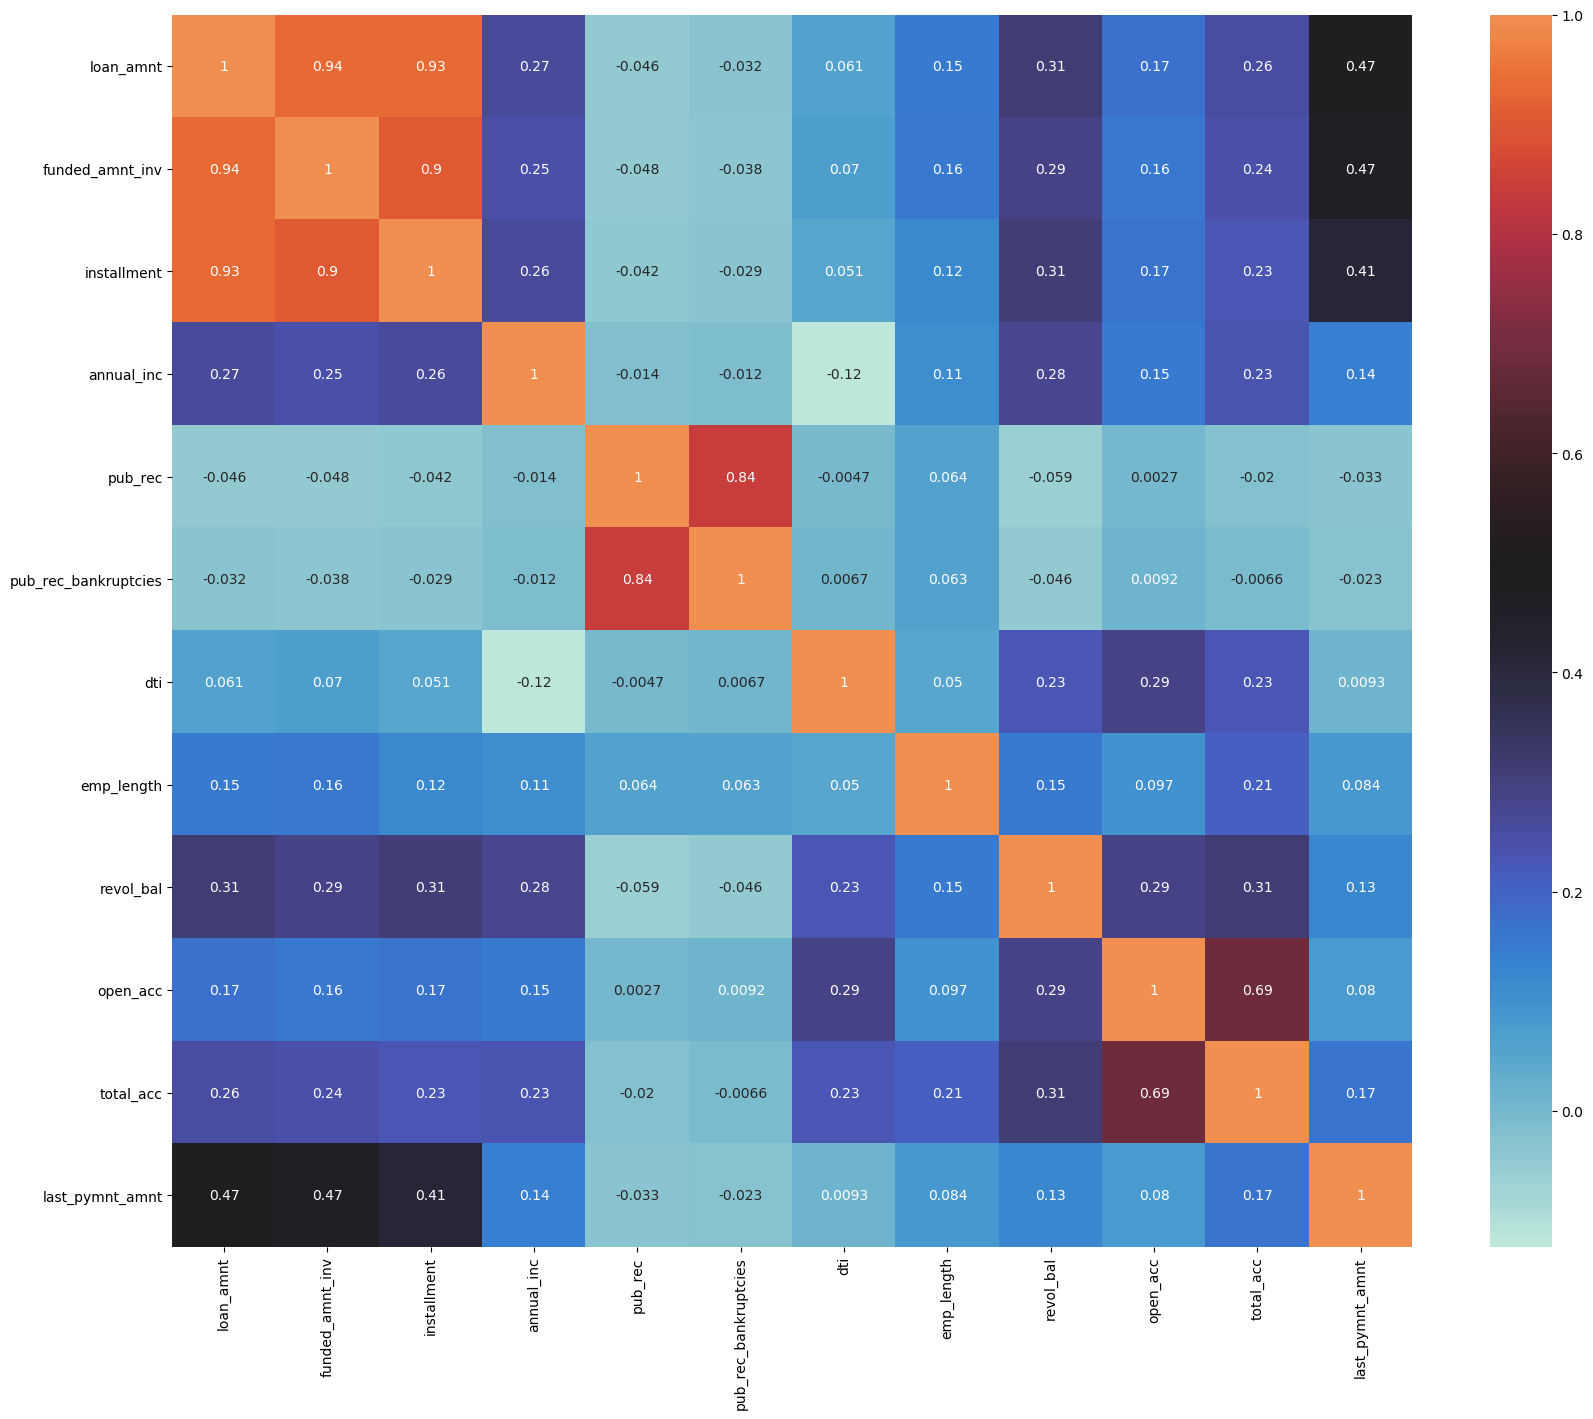

In [51]:
# Replotting a Focused heatmap based on the Above Pandas profiler
plt.figure(figsize=(20,16))
cont_var= ['loan_amnt','funded_amnt_inv','installment','annual_inc','pub_rec','pub_rec_bankruptcies','dti',
           'emp_length','home_ownership','interest_bracket','revol_bal', 'revol_util','open_acc','total_acc',
           'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d','defaulted']

corr = loan_cleaned[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

### 4.1. Continous Variables

From the Co-relation map, the following can be intepreted :

1. **High +ve Co-relation** : loan_amnt, funded_amnt_inv,installment
2. **Medium +ve Co-relation** : annual_inc with each of the (loan_amnt, funded_amnt_inv,installment)
3. **High +ve Co-relation** : pub_rec & pub_rec_bankruptcies
4. **Medium -ve Co-relation** : dti & annual_inc


Let's recap the definition of these columns :
1. **loan_amnt** : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

2. **funded_amnt_inv** : The total amount committed by investors for that loan at that point in time.

3. **installment** :  The monthly payment owed by the borrower if the loan originates.

4. **Annual_inc** : The self-reported annual income provided by the borrower during registration.

5. **pub_rec** : Number of derogatory public records

6. **pub_rec_bankruptcies** : Number of public record bankruptcies

7. **dti** : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [52]:
bivar_analysis =  loan_cleaned[['loan_amnt','funded_amnt_inv','installment','annual_inc',
                                    'pub_rec','pub_rec_bankruptcies','dti','defaulted']]

bivar_analysis.head()

,loan_amnt,funded_amnt_inv,installment,annual_inc,pub_rec,pub_rec_bankruptcies,dti,defaulted
0,5000,4975.0,162.87,24000.0,0,0.0,27.65,No
1,2500,2500.0,59.83,30000.0,0,0.0,1.00,Yes
2,2400,2400.0,84.33,12252.0,0,0.0,8.72,No
3,10000,10000.0,339.31,49200.0,0,0.0,20.00,No
5,5000,5000.0,156.46,36000.0,0,0.0,11.20,No


### 4.1.1 Loan Amount v/s Funded Loan Amount

Here we try to compare the loan amount requested by the applicant and the amount granted by the Lending Case Company.
By intuition it's natural as the loan amounted requested increases, the sanctioned amount will increase.

We want to analyse the trend across both Defaulted & Non Defaulted Loan

In [53]:
group = bivar_analysis.groupby(['loan_amnt','defaulted'],as_index=False).agg({'funded_amnt_inv':'mean',
                                                                  'installment':'mean','annual_inc':'mean',
                                                                  'pub_rec':'median','pub_rec_bankruptcies':'median',
                                                                  'dti' : 'median'
                                                                           })
group.head()

,loan_amnt,defaulted,funded_amnt_inv,installment,annual_inc,pub_rec,pub_rec_bankruptcies,dti
0,500,No,465.0,16.16,26080.808,0.0,0.0,4.27
1,700,No,700.0,23.35,19000.000,0.0,0.0,12.38
2,725,No,650.0,22.51,12000.000,0.0,0.0,3.60
3,750,No,725.0,25.02,19000.000,0.0,NaN,24.00
4,800,No,800.0,24.84,35000.000,0.0,NaN,7.65


Text(0.5, 1.0, 'Loan Amount Request Vs Invested (Defaulted Loans)')

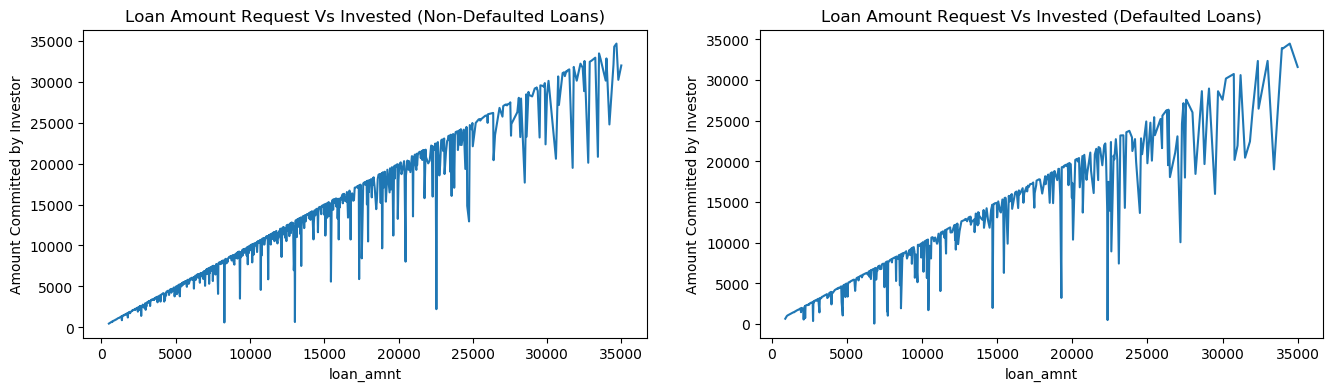

In [54]:
plt.figure(figsize=[16.0,4.0])
plt.subplot(121)
sns.lineplot(x=group[group.defaulted=="No"]['loan_amnt'],y=group[group.defaulted=="No"]['funded_amnt_inv'])
plt.ylabel("Amount Committed by Investor")
plt.title("Loan Amount Request Vs Invested (Non-Defaulted Loans)") 

plt.subplot(122)
sns.lineplot(x=group[group.defaulted=="Yes"]['loan_amnt'],y=group[group.defaulted=="Yes"]['funded_amnt_inv'])
plt.ylabel("Amount Committed by Investor")
plt.title("Loan Amount Request Vs Invested (Defaulted Loans)") 

**Observations**

1. The overall intuition holds true with a general linear trendline with positive slope
2. It's interesting to notice the noise(dropping lines) showing that certain loans grants differ massively from the requested amount.
3. Also,as a natural fact, **NO** loan was funded more than the requested amount. This proves the correctness of the data.  
4. The most important thing to notice is the slope difference between Non-Defaulted & Defaulted Loans.  
    i. Non-Defaulted Loans have a higher positive slope than Defaulted Loans.  
    ii. This shows the loan funded was closer to that requested for Non-Defaulted Loans.  
    iii. The above observation is reinforced by the drooping lines having higher magnitude for Defaulted Loans.  
    iv. Which means, Defaulted Loans where more frequently and majorly funded less, compared to the requested amount.  

### 4.1.2. Loan Amount v/s Monthly

Here we try to compare the loan amount requested by the applicant and the monthly installment it would render for the Lending Company.
By intuition it's natural as the loan amounted requested increases, the monthly installment will increase. Though it depends on the **interest rate** and the **lending period** of the loan.

We want to analyse the trend across both Defaulted & Non Defaulted Loan

Text(0.5, 1.0, 'Loan Amount  Vs Monthly Installment (Non-Defaulted Loans)')

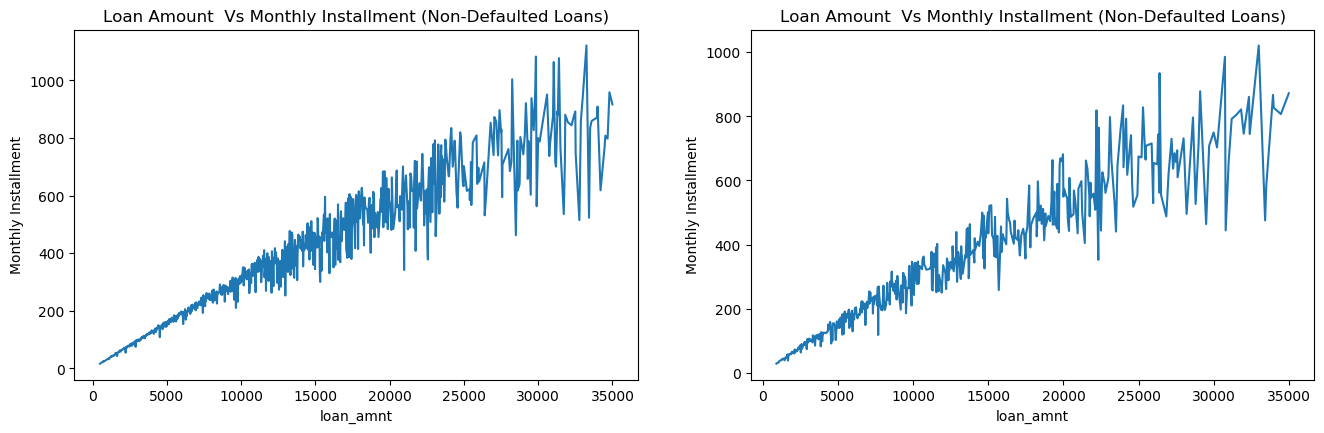

In [55]:
plt.figure(figsize=[16.0,10.0])
plt.subplot(223)
sns.lineplot(x=group[group.defaulted=="No"]['loan_amnt'],y=group[group.defaulted=="No"]['installment'])
plt.ylabel("Monthly Installment")
plt.title("Loan Amount  Vs Monthly Installment (Non-Defaulted Loans)") 

plt.subplot(224)
sns.lineplot(x=group[group.defaulted=="Yes"]['loan_amnt'],y=group[group.defaulted=="Yes"]['installment'])
plt.ylabel("Monthly Installment")
plt.title("Loan Amount  Vs Monthly Installment (Non-Defaulted Loans)") 

**Observationss**

1. We again see a near linear relation between Loan Amount & Monthly Installment.
2. Though this time the noise/outliers are present on either side of the linear trend.
3. It can be seen that the deviation from the general trend diverges more as the Loan Amount increases.
4. It's also visible that the slope of the linear trend is lower for Defaulted Loans as compared to Non-Defaulted  loans.
5. The magnitude of diversion from the linear trend is more for Defaulted Loans.
6. This makes a strong point on dependence on interest rate & period of loan affects more for high amount & defaulted loans.

### 4.1.3. Loan Amount v/s Annual Income

Here we try to compare the loan amount requested by the applicant and the Annual Income of the applicant.

There is no natural intuition on how would this relationship be, but a general guess would be, that people with higher income might request loan for higher amount, maybe because of there needs.

We want to analyse the trend across both Defaulted & Non Defaulted Loan

Text(0.5, 1.0, 'Loan Amount  Vs Annual Income (Defaulted Loans)')

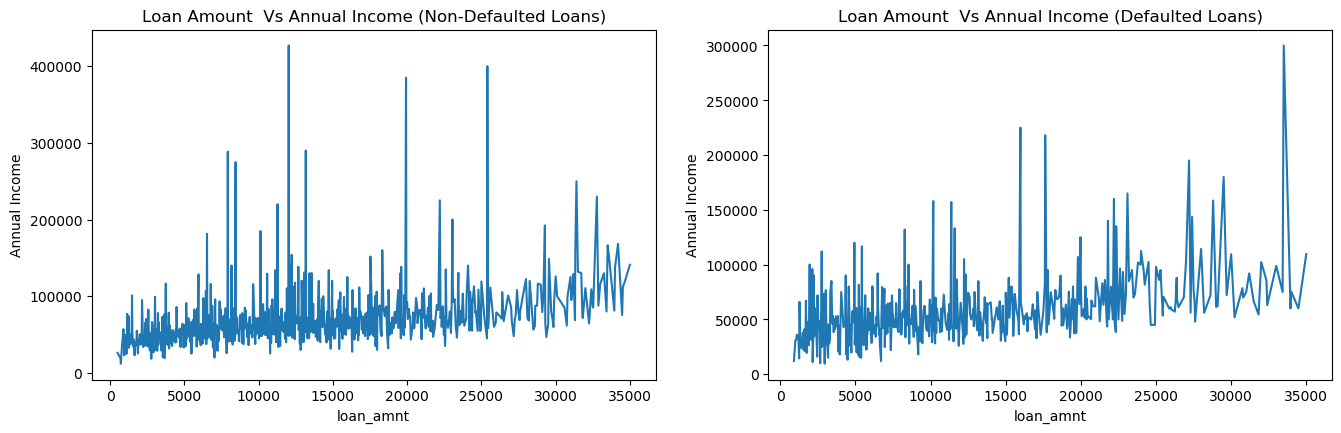

In [56]:
plt.figure(figsize=[16.0,10.0])
plt.subplot(223)
sns.lineplot(x=group[group.defaulted=="No"]['loan_amnt'],y=group[group.defaulted=="No"]['annual_inc'])
plt.ylabel("Annual Income")
plt.title("Loan Amount  Vs Annual Income (Non-Defaulted Loans)") 

plt.subplot(224)
sns.lineplot(x=group[(group.defaulted=="Yes") & (group.annual_inc<=1000000)]['loan_amnt'],
             y=group[group.defaulted=="Yes"]['annual_inc'])
plt.ylabel("Annual Income")
plt.title("Loan Amount  Vs Annual Income (Defaulted Loans)")
# We have capped the Annual Income to 1 million USD as there are a few outliers with very high income.

**Observations**

In this case, we can see a very slight trend (almost parallel to X-Axis)

1. It can be observed that the slope of the trend increases as we move along the X-Axis, i.e. (higher laon amount)
2. Annual Income varies more frequently for Defaulted Loans.
3. The slope is higher for defaulted loans, i.e. Annual Income is more related to Loan Amount for Loan Defaultes.
4. Outliers(spikes) in the graph are more prominenet for Loan defaulters.
5. It should be **noted** that we upper limit the graph for Defaulted Loans to ave an equivalent comparison with Non-Deaulted Loans.

### 4.1.4.  Annual Income v/s DTI

Here we try to compare the DTI and the Annual Income of the applicant.

There is no natural intuition on how would this relationship be, and so we want to analyse the trend across both Defaulted & Non Defaulted Loan

Text(0.5, 1.0, 'Annual Income  v/s DTI (Defaulted Loans)')

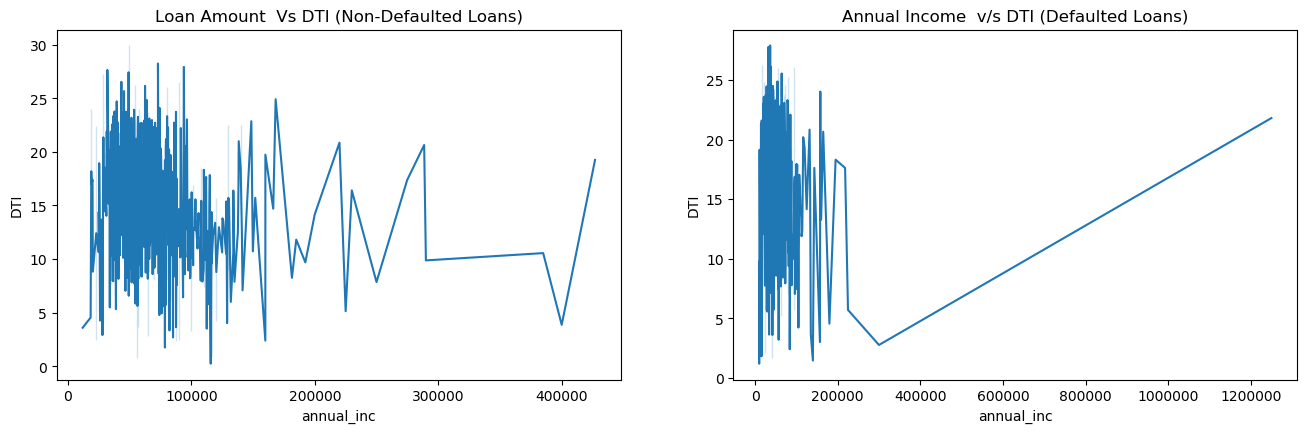

In [57]:
plt.figure(figsize=[16.0,10.0])
plt.subplot(223)
sns.lineplot(x=group[group.defaulted=="No"]['annual_inc'],y=group[group.defaulted=="No"]['dti'])
plt.ylabel("DTI")
plt.title("Loan Amount  Vs DTI (Non-Defaulted Loans)") 

plt.subplot(224)
sns.lineplot(x=group[group.defaulted=="Yes"]['annual_inc'],y=group[group.defaulted=="Yes"]['dti'])
plt.ylabel("DTI")
plt.title("Annual Income  v/s DTI (Defaulted Loans)") 

**Observations**

The plots can be divided into two sections.
1. Annual Income < 200000 USD
2. Annual Income  > 200000 USD

**Inferences** 
1. For Annual Income < 200000$ there is no trend/relationship that can be identified.
2. For Non-defaulted Loans , DTI shows a negative trend (falling) as annual income increases.
3. For Defaulted Loans, DTI clearly increases with annual income.
4. Something interesting to notice is the 0-5 DTI range.
    i.  Non-Defaulted Loans have very few applications in this range, and closer to the upper boundary.  
    ii.  For Defaulted Loans we have comparitively higher cases in 0- DTI range and more applicants are closer to 0.


## 4.2. Categorical Values

In [58]:
# We chose the below field to conduct Bivariate & Trivariate Analysis
category_bivariate = loan_cleaned[['loan_amnt','emp_length','home_ownership','interest_bracket','defaulted']]
category_bivariate.head()

,loan_amnt,emp_length,home_ownership,interest_bracket,defaulted
0,5000,10,RENT,10-15,No
1,2500,0,RENT,15-20,Yes
2,2400,10,RENT,15-20,No
3,10000,10,RENT,10-15,No
5,5000,3,RENT,5-10,No


### 4.2.1. Employment Length v/s Loan Amount for Defaulted & Non-Defaulted Loan

Here we try to check any relation between Employment Length v/s Loan Amount (i.e. number of loans, total loan issued, mean size of the loan, median of the issued loan.

In [59]:
employment_default = category_bivariate.groupby(['emp_length','defaulted'],
                                                as_index=False).agg({'loan_amnt' : ["count","sum","mean","median"]})
employment_default.columns = employment_default.columns.droplevel()
employment_default.columns = ['emp_length', 'defaulted','number_of_loans','total_loan_amnt','average_loan_amnt','med_loan_amnt']
employment_default.head()

,emp_length,defaulted,number_of_loans,total_loan_amnt,average_loan_amnt,med_loan_amnt
0,0,No,3869,36563725,9450.432928,8000.0
1,0,Yes,639,6586600,10307.668232,8000.0
2,1,No,2713,27007600,9954.883892,8000.0
3,1,Yes,456,4862475,10663.322368,8912.5
4,2,No,3724,37355975,10031.142589,8287.5


[Text(0, 0.5, 'Total Loan Amount')]

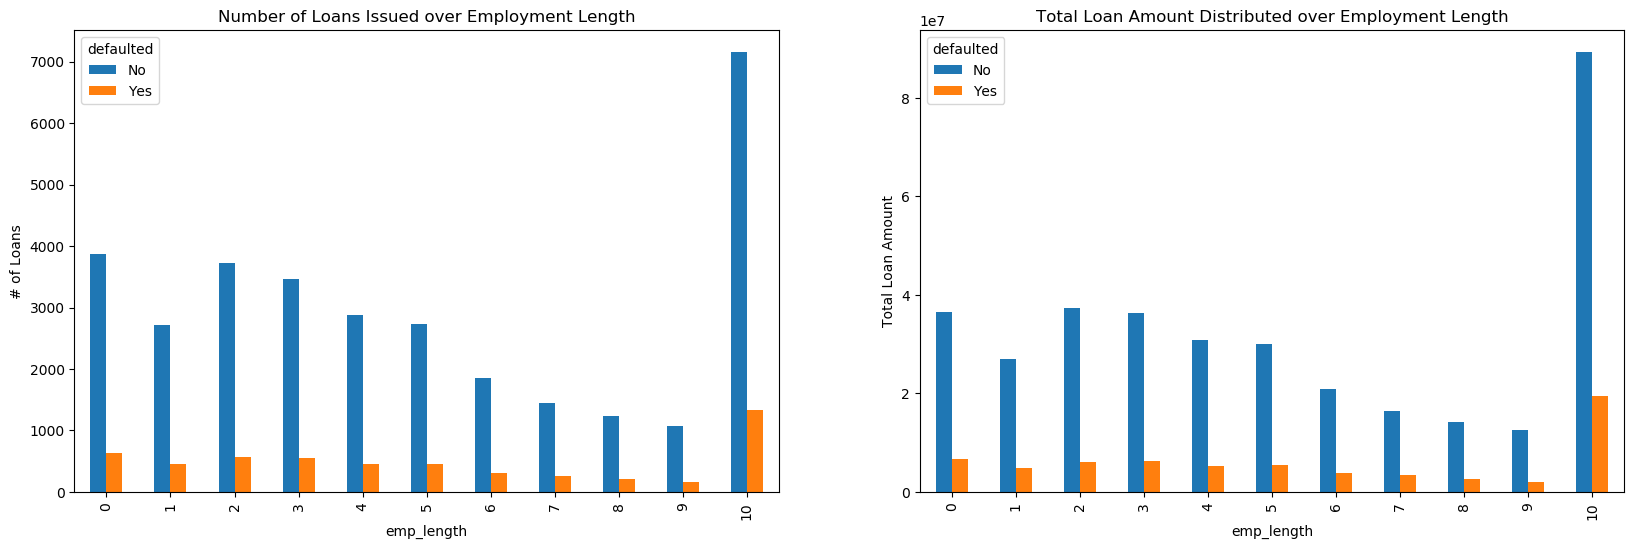

In [60]:
# plt.figure(figsize=[20.0,16.0])
plt.rcParams["figure.figsize"] = (20,6)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

num_loan  = employment_default.pivot(index='emp_length',columns='defaulted',values='number_of_loans').reset_index()
total_loan_amnt  = employment_default.pivot(index='emp_length',columns='defaulted',values='total_loan_amnt').reset_index()

num_loan.plot(x="emp_length", y=["No", "Yes"], kind="bar",
              title ="Number of Loans Issued over Employment Length",ax=ax1).set(ylabel="# of Loans")

total_loan_amnt.plot(x="emp_length", y=["No", "Yes"], kind="bar",
                     title ="Total Loan Amount Distributed over Employment Length",ax=ax2).set(ylabel="Total Loan Amount")


**Observations**
1. Number of Loans & Total Amount of Loan follow the same distribution which is natural as a property of Cumulative Sum
2. It's noticeable that 10+ years of employment has the most number of issued loan and hence the maximum number of defaults.
3. 0-5 years of Employment also, have very similar number of loans issued which is approximately half of number of loans issed for 10 years of employment.
4. The astonishing fact is a sudden decreasing trend from 6 years to 9 years of employment.

[Text(0, 0.5, 'Median Loan Amount')]

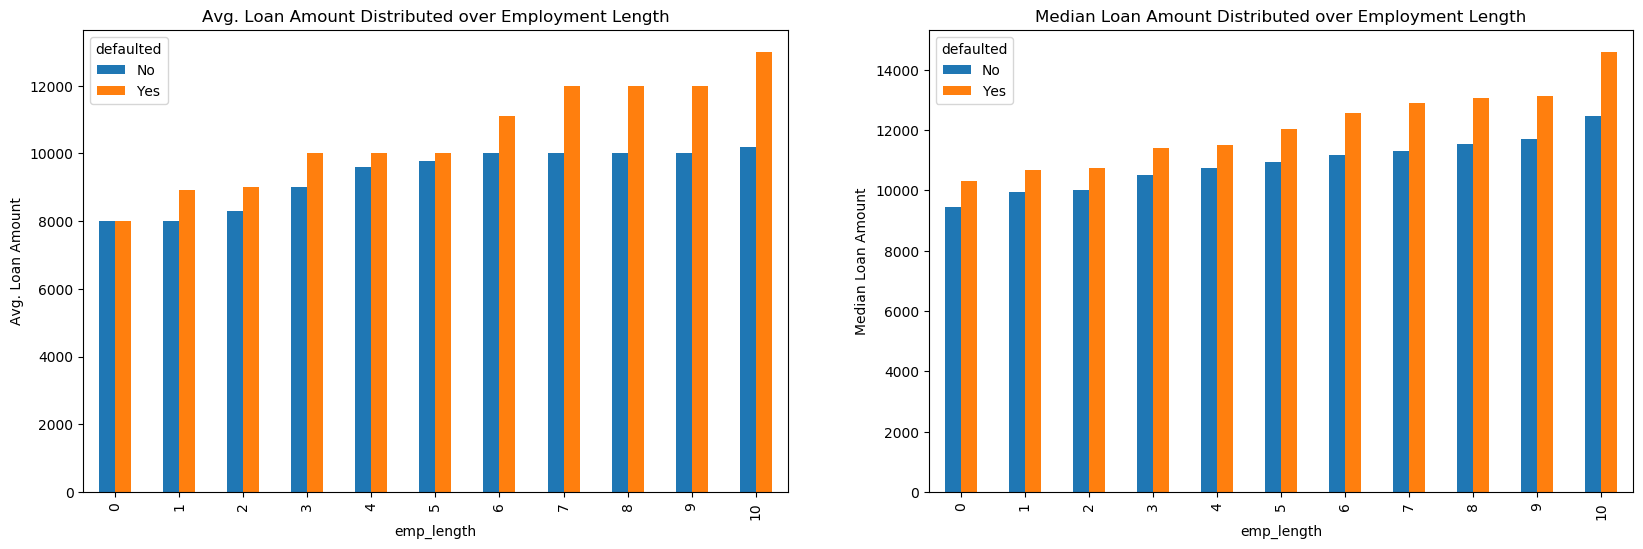

In [61]:
plt.rcParams["figure.figsize"] = (20,6)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

avg_loan_amnt  = employment_default.pivot(index='emp_length',columns='defaulted',values='average_loan_amnt').reset_index()
med_loan_amnt  = employment_default.pivot(index='emp_length',columns='defaulted',values='med_loan_amnt').reset_index()

med_loan_amnt.plot(x="emp_length", y=["No", "Yes"], kind="bar",
                   title ="Avg. Loan Amount Distributed over Employment Length",ax=ax1).set(ylabel="Avg. Loan Amount")

avg_loan_amnt.plot(x="emp_length", y=["No", "Yes"], kind="bar",
                   title ="Median Loan Amount Distributed over Employment Length",ax=ax2).set(ylabel="Median Loan Amount")

**Observations**

When we look at the average/median loan amount over employment years, the story completely changes. Some quick points are  :

1. Average/Median Loan gradually increases with increase in employment years.
2. Amount of Defaulted Loan(in orange) is generally higher in most of the cases compared to the Non-Defaulted Loan Amount.
3. The difference b/w avg./median Loan amount for Defaulted & Non-Defaulted Loans is higher for employment years > 5

### 4.2.2 Home ownership v/s Loan Amount for Defaulted/Non-Defaulted Loans

We now try to explore relationship & distribution between Home Ownership status against the Loan Amount(count,total sum,average & median)

In [62]:
employment_home_own =  category_bivariate.groupby(['defaulted','home_ownership'],
                                                as_index=False).agg({'loan_amnt' : ["count","sum","mean","median"]})
employment_home_own.columns = employment_home_own.columns.droplevel()
employment_home_own.columns = ['defaulted','home_own','number_of_loans','total_loan_amnt','average_loan_amnt','med_loan_amnt']
employment_home_own = employment_home_own[employment_home_own.home_own!="NONE"]
employment_home_own.head()

,defaulted,home_own,number_of_loans,total_loan_amnt,average_loan_amnt,med_loan_amnt
0,No,MORTGAGE,14350,176046600,12268.055749,10000
2,No,OTHER,80,797525,9969.062500,8500
3,No,OWN,2370,23976450,10116.645570,8000
4,No,RENT,15342,150520975,9811.039956,8000
5,Yes,MORTGAGE,2245,31925850,14220.868597,12325


[Text(0, 0.5, 'Total Loan Amount')]

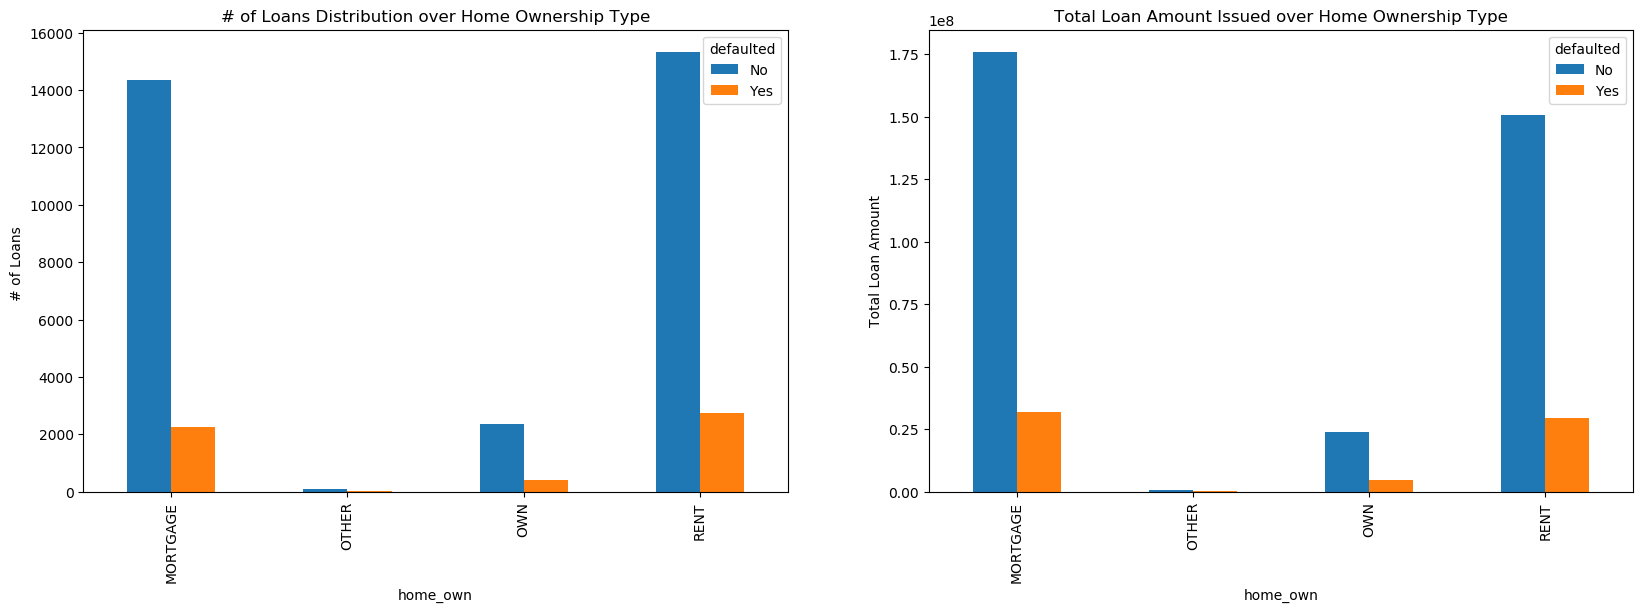

In [63]:
# plt.figure(figsize=[20.0,16.0])
plt.rcParams["figure.figsize"] = (20,6)
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)

num_loan  = employment_home_own.pivot(index='home_own',columns='defaulted',values='number_of_loans').reset_index()
total_loan_amnt  = employment_home_own.pivot(index='home_own',columns='defaulted',values='total_loan_amnt').reset_index()


num_loan.plot(x="home_own", y=["No", "Yes"], kind="bar",
              title="# of Loans Distribution over Home Ownership Type",ax=ax1).set(ylabel="# of Loans ")

total_loan_amnt.plot(x="home_own", y=["No", "Yes"], kind="bar",
                     title="Total Loan Amount Issued over Home Ownership Type",ax=ax2).set(ylabel="Total Loan Amount")


**Observations**

1. Approximately same number of Loans has been sanctioned to applicatants having Home as Mortage or Rented
2. Strickingly, total amount of loan for  applicant's with Rent house is lesser than that of Mortgage.
3. Own & Others rank towards the end of the loan applicants getting loan.

[Text(0, 0.5, 'Median Loan Amount')]

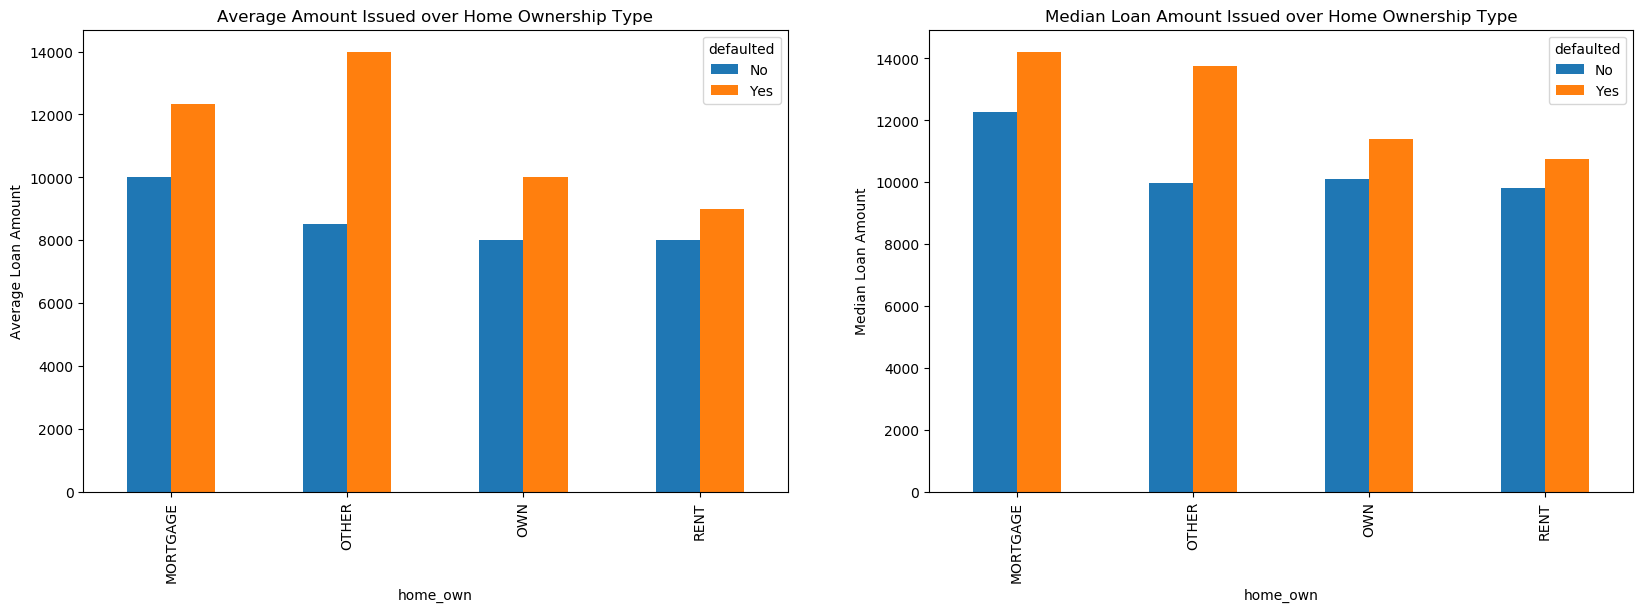

In [64]:
plt.rcParams["figure.figsize"] = (20,6)
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)

avg_loan_amnt  = employment_home_own.pivot(index='home_own',columns='defaulted',values='average_loan_amnt').reset_index()
med_loan_amnt  = employment_home_own.pivot(index='home_own',columns='defaulted',values='med_loan_amnt').reset_index()

med_loan_amnt.plot(x="home_own", y=["No", "Yes"], kind="bar",
                   title="Average Amount Issued over Home Ownership Type",ax=ax1).set(ylabel="Average Loan Amount")
avg_loan_amnt.plot(x="home_own", y=["No", "Yes"], kind="bar",
                   title="Median Loan Amount Issued over Home Ownership Type",ax=ax2).set(ylabel="Median Loan Amount")

**Observations**

1. The avg./median for applicant's with Home Ownership as Mortgage & Other is the highest in the 4 categories.
2. The difference between the Defaulted & Non-Defaulted Loan Amount is also maximumm for Other & Mortgage home owner applicant's.
3. Hence we can safely decide on thresholds for each Home Ownership type above which we mark loans as highly risky.

### 4.2.3 Distibution of Defaulted Loans across Home Type

[Text(0, 0.5, 'Number of Loans issued')]

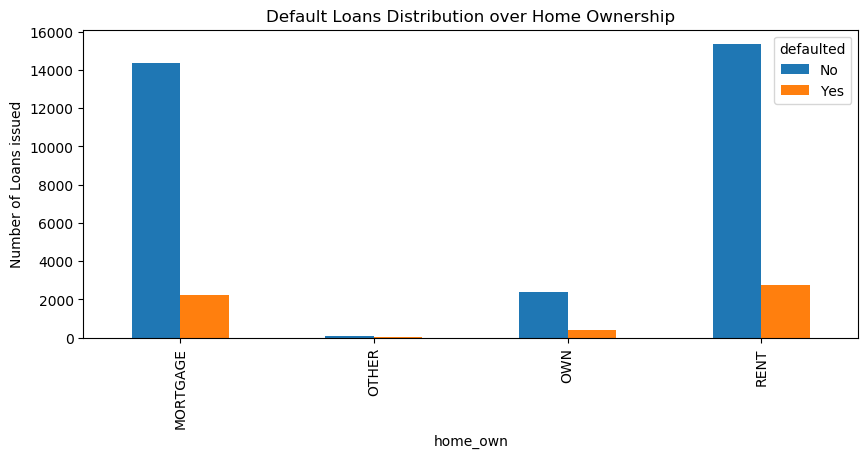

In [65]:
plt.rcParams["figure.figsize"] = (10,4)

home_type_default = employment_home_own.pivot(index='home_own',columns='defaulted',values='number_of_loans').reset_index()
# home_type_default
home_type_default.plot(x="home_own", y=["No", "Yes"], kind="bar",
                       title="Default Loans Distribution over Home Ownership").set(ylabel="Number of Loans issued")

### 4.2.4 Interest Rate Charged v/s Home Ownership for Defaulted/Non-Defaulted Loans

We now explore, the relationship between Interest Rate charged on a loan with the Home Ownership status of applicants. And it's distribution over Defaulted & Non-Defaulted Loans

In [66]:
employment_interest =  category_bivariate.groupby(['defaulted','interest_bracket','home_ownership'],
                                                as_index=False)['loan_amnt'].count()
employment_interest.head()

,defaulted,interest_bracket,home_ownership,loan_amnt
0,No,10-15,MORTGAGE,6274
1,No,10-15,OTHER,44
2,No,10-15,OWN,1116
3,No,10-15,RENT,7845
4,No,15-20,MORTGAGE,2272


[Text(0, 0.5, 'Number of Loans')]

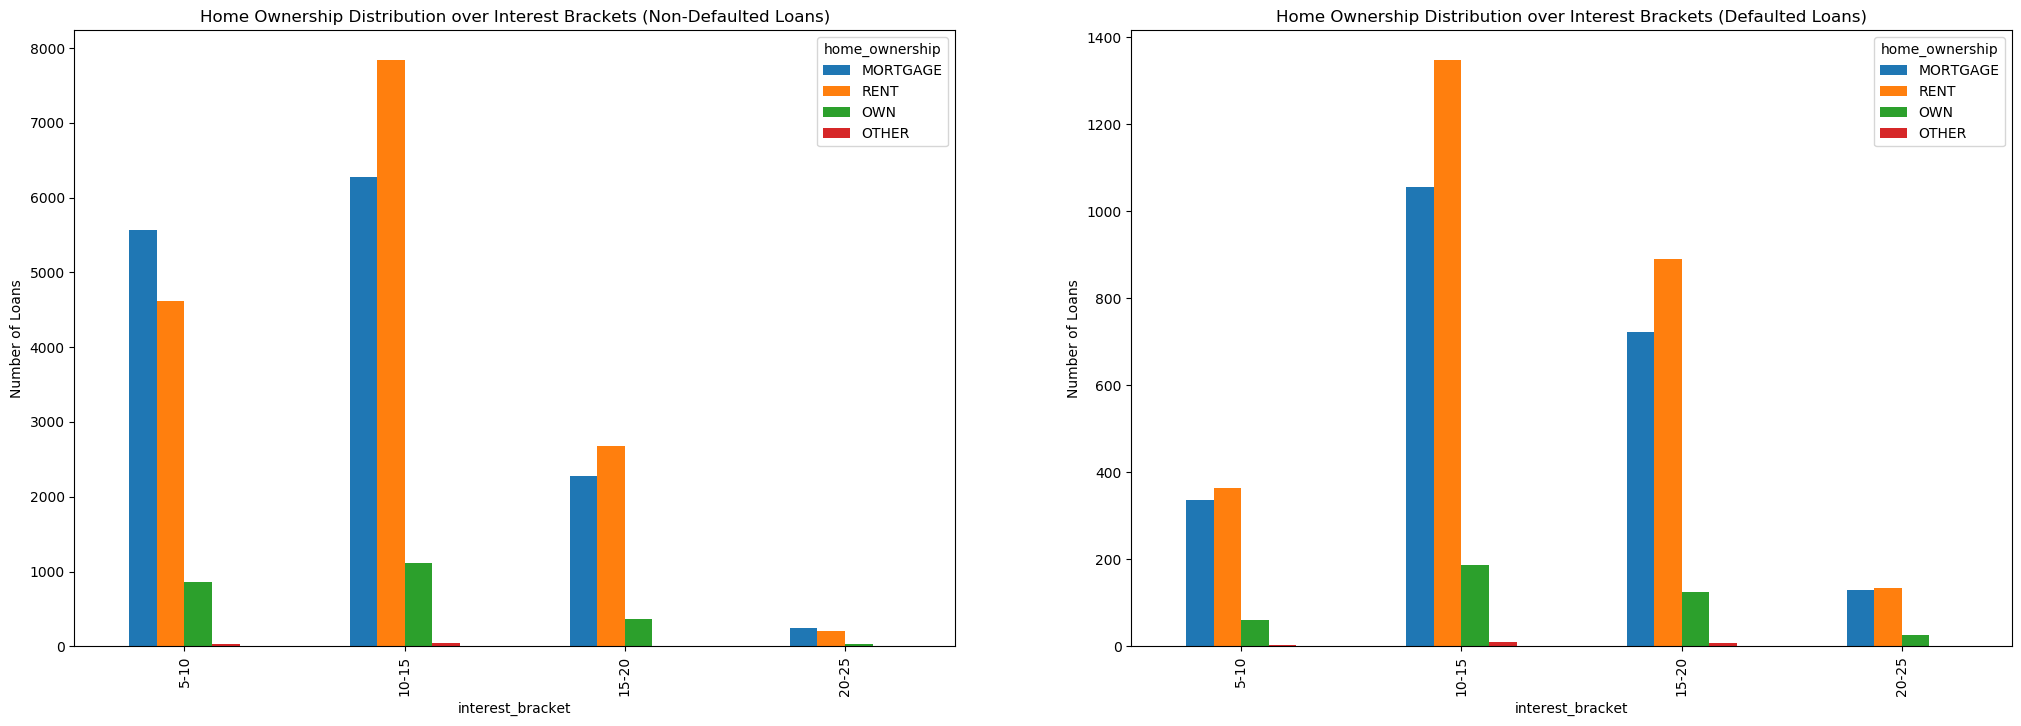

In [67]:
plt.rcParams["figure.figsize"] = (25,8)
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)

default_interest_yes  = employment_interest[employment_interest.defaulted=="Yes"].pivot(index='interest_bracket',
                                                               columns='home_ownership',values='loan_amnt').reset_index()
default_interest_yes = default_interest_yes.reindex([3,0,1,2])


default_interest_no  = employment_interest[employment_interest.defaulted=="No"].pivot(index='interest_bracket',
                                                               columns='home_ownership',values='loan_amnt').reset_index()
default_interest_no =default_interest_no.reindex([3,0,1,2])



default_interest_no.plot(x="interest_bracket", y=["MORTGAGE", "RENT","OWN","OTHER"], kind="bar",
                         title="Home Ownership Distribution over Interest Brackets (Non-Defaulted Loans)",ax=ax1).set(ylabel="Number of Loans")
default_interest_yes.plot(x="interest_bracket", y=["MORTGAGE", "RENT","OWN","OTHER"], kind="bar",
                          title="Home Ownership Distribution over Interest Brackets (Defaulted Loans)",ax=ax2).set(ylabel="Number of Loans")


**Observations**

1. For Non-defaulted Loans, we can see majorly loans in 5-10 & 10-15 percent interest bracket.
2. For Defaulted Loans, we can see majorly loans in 10-15 & 15-20 percent interest bracket.
3. The stricking fact is that for Defaulted loans, 5-10 percent interest bracket has less number of loans. This can be attributed to these being more risky loans.

# Recommendations

Based on the analysis we have the following observations & recommendations.

**Action** : Stop issuing Loans below E grade.  
**Action** : Stop issuing Loans to applicant whose Home Ownership is OTHER type.  
**Precaution** : Loans for the purpose of Small Business is highly risky.  
**Suggestion** : Applicants with mid-term employment(5-9) years should be given preference.  
**Insight** : Based on Employment Length of an applicant,we can suggest thresholds above which loans have high chance of defaulting.  
**Insight** : Based on the Home Ownership of an applicant, we suggest thresholds above which loans have high chance of defaulting.  
**Suggestion** : We suggest increasing interest rate for loans(>10) to maximize profit for applicants with Rented house.  
**Suggestion** : For Loan Amount > 25000$ , investors need to reduce loan sanctions or amount.  
